### Jupyter Notebook for Section 1 - Data exploration and pre-processing

In [6]:
# Imports of useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
# Dataset loading
df=pd.read_csv('RTP_traffic_dataset.csv')

In [4]:
# Display of first row of dataset for reference
df.head(1)

,timestamp,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,...,inter_time_sequence_max_value_count_percent,num_packet_loss,software,ssrc,ip_src,ip_dst,prt_src,prt_dst,p_type,n_call
0,2020-12-14 13:34:39.500,0.011279,0.011439,0.002316,0.02405,3,-1.5,0.513926,4.014318e-07,1.079044e-08,...,0.333333,0,webrtc,0x401fff15,132.145.230.5,192.168.1.126,443,34102,114,1


### <ins>Point 1.</ins>

In the first point, the questions to be answered are: 
-  When did the whole traffic collection start and end in time?
-  How many videoteleconferencing calls are there in total?
-  What is the total duration of all calls, and what is their average duration?

We will address each question in the requested order with a code and markdown cells for each one of them, providing this way a short explanation of the procedure and the related code implementation.

The first question requests to find the start and end in time of the data collection. Thanks to the prior knowledge of the dataset, this task is performed by applying the max() and min() methods to the 'timestamp' column. This approach works as long as the time format is consistent along the dataset and since it's the case, we display below the obtained results:

In [8]:
t_end = df['timestamp'].max()
t_start = df['timestamp'].min()
print('The starting time of the data collection is:',t_start)
print('The finishing time of the data collection is:',t_end)

The starting time of the data collection is: 2020-04-17 07:59:45.500
The finishing time of the data collection is: 2021-01-18 15:03:18.000


The second question...

In [7]:
df['timestamp']=pd.to_datetime(df['timestamp'])
Durations=[]
P1=df['n_call'].value_counts().sort_index()
for i in P1.index:
    filt=df['n_call']==i
    P=df[filt]
    P=P.set_index(np.array(range(len(P['timestamp'])))) 
    DurationCalls=P.loc[len(P)-1]['timestamp']-P.loc[0]['timestamp']
    Durations.append(DurationCalls)
#print(Durations)
len(Durations)
print(np.array(Durations).mean())


0 days 00:41:22.632352941


In [8]:
print('The number of calls is:',len(P1))

The number of calls is: 68


### <ins>Point 2.</ins>

In [2]:
# Delete equal statistical attributes
print('Are there one attribute features?')
stat_feat= df.iloc[:,1:74].columns
#cnt_zero_feats=df[stat_feat].count()
count_zero_feats = np.count_nonzero(df[stat_feat], axis=0)
any(count_zero_feats==1)

Are there one attribute features?


False

### <ins>Point 3.</ins>

In [3]:
filt2=df['num_packet_loss']==0
df['label']=1
df.loc[filt2,'label']=0

In [26]:
Count_lossy=df['label'].sum()
Count_lossless= len(df['label'])-Count_lossy
print('The lossy transmissions are:',Count_lossy,'The lossless are:',Count_lossless,'out of ',len(df),'time windows')

The lossy transmissions are: 32479 The lossless are: 2105448 out of  2137927 time windows


C:\Users\utente\AppData\Local\Temp\ipykernel_13692\726031400.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


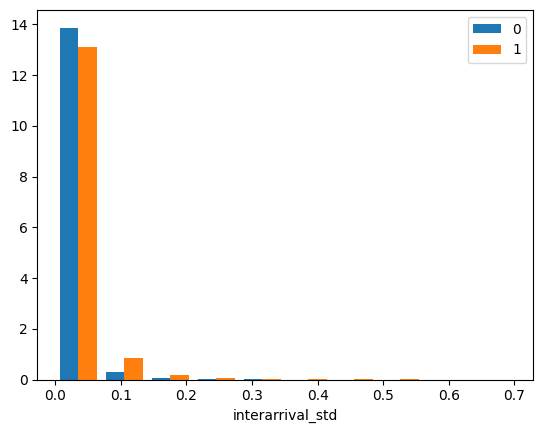

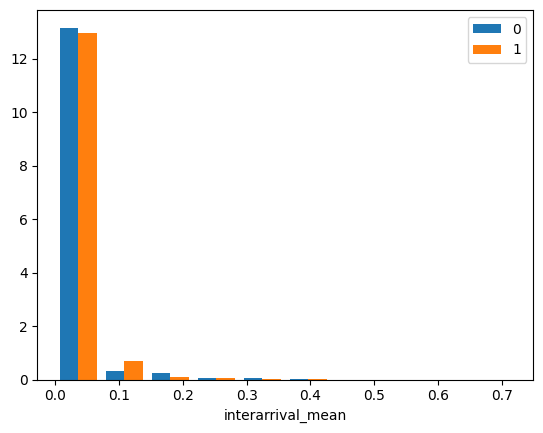

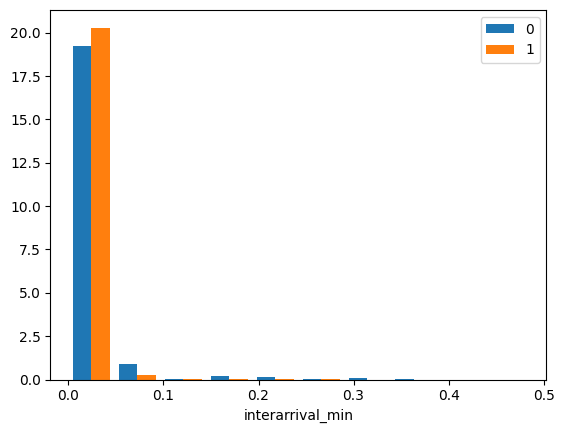

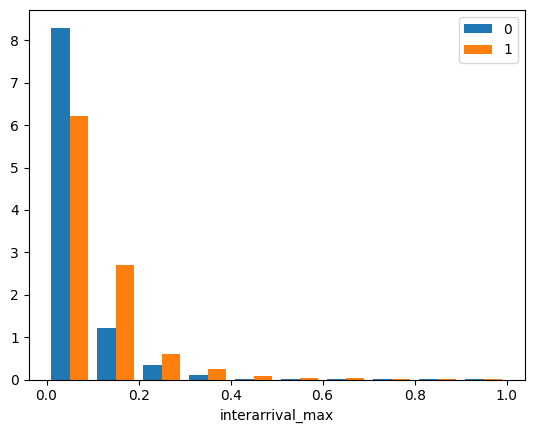

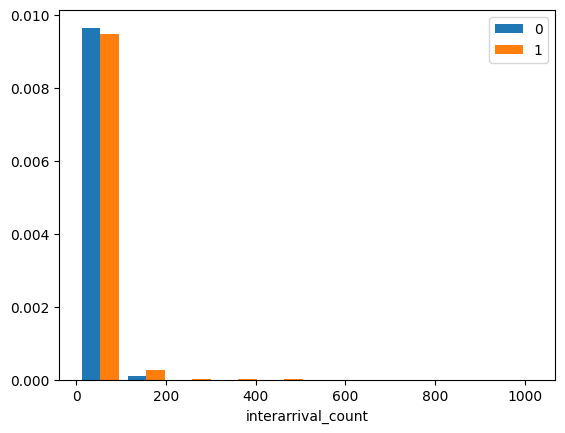

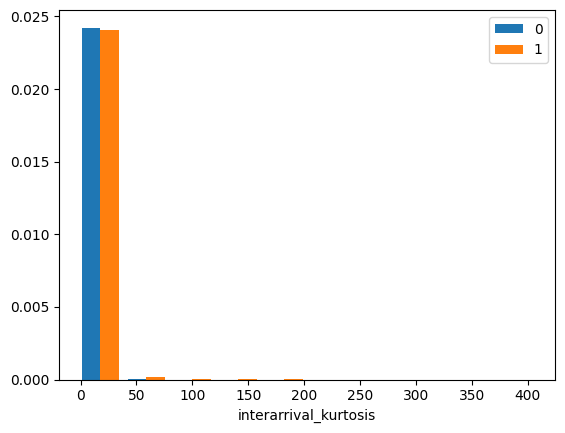

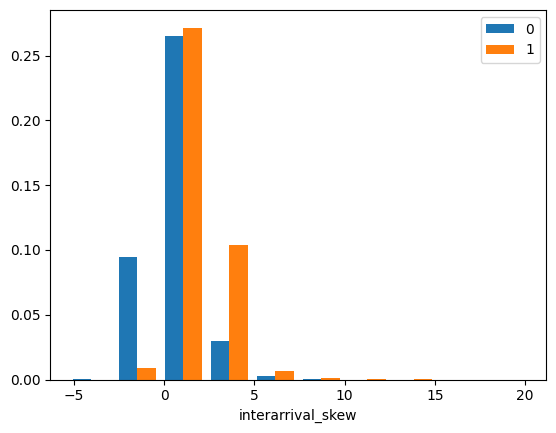

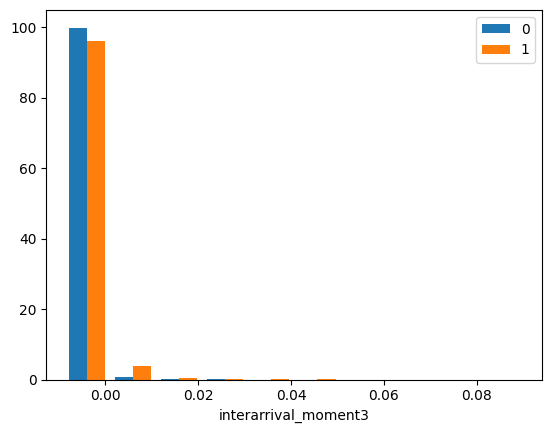

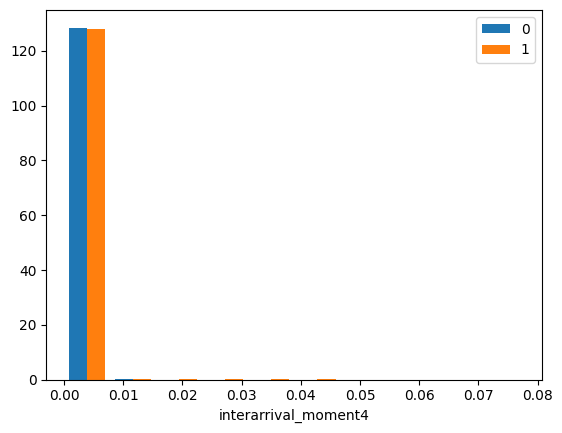

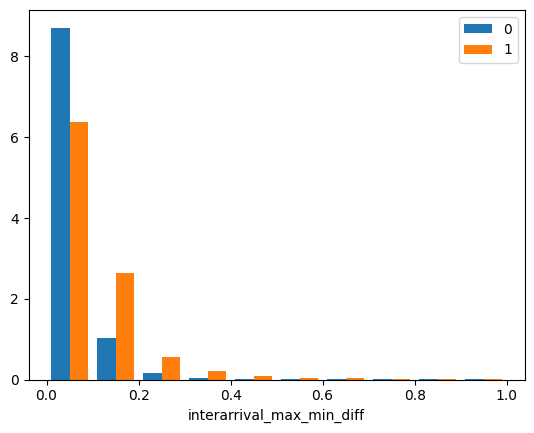

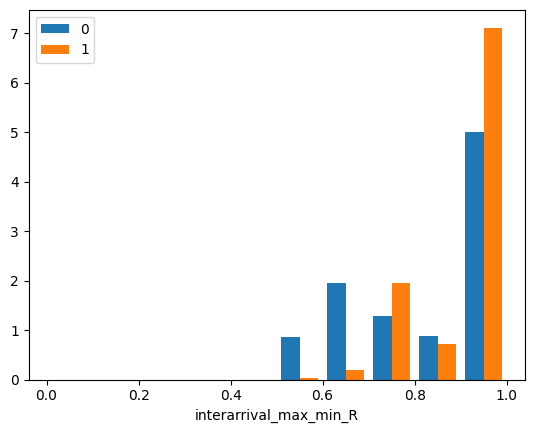

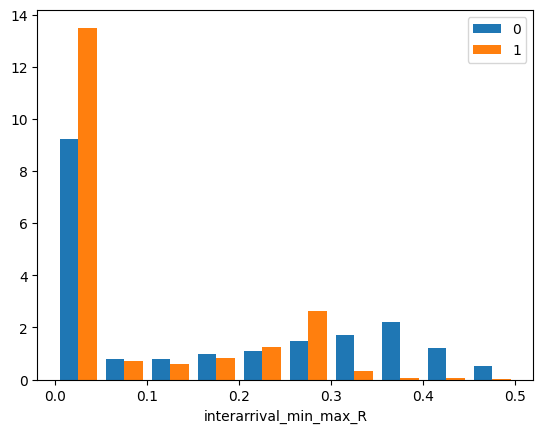

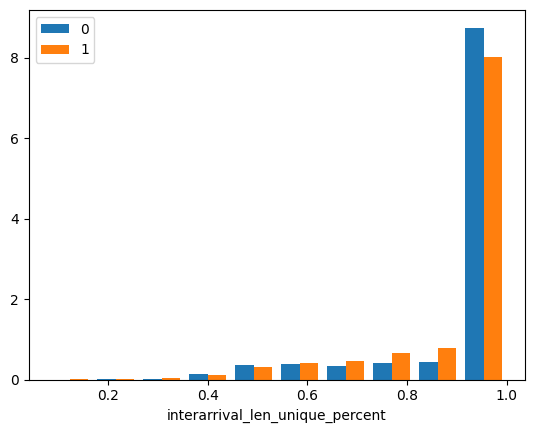

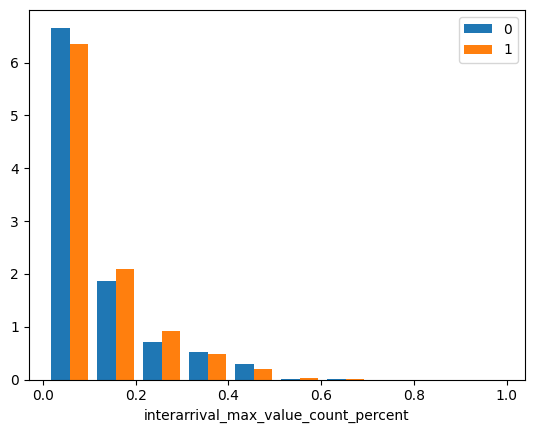

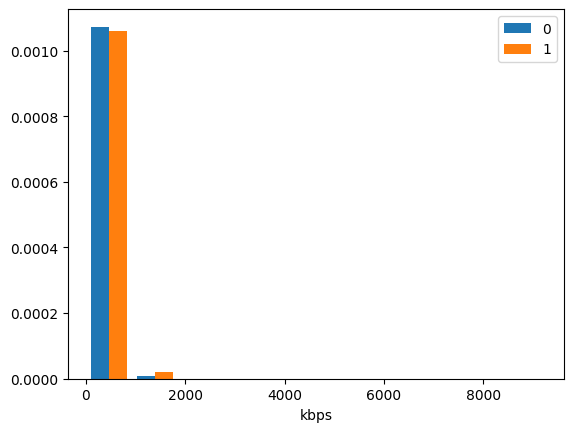

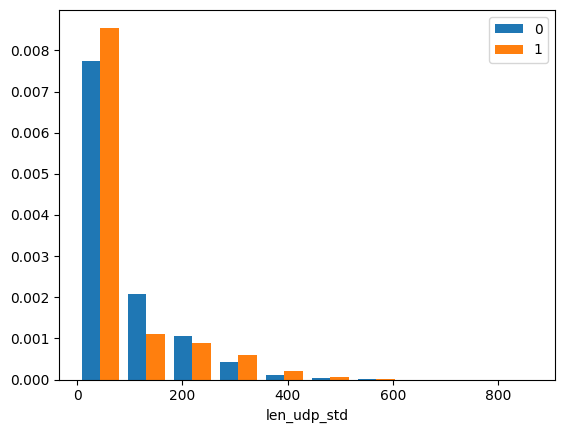

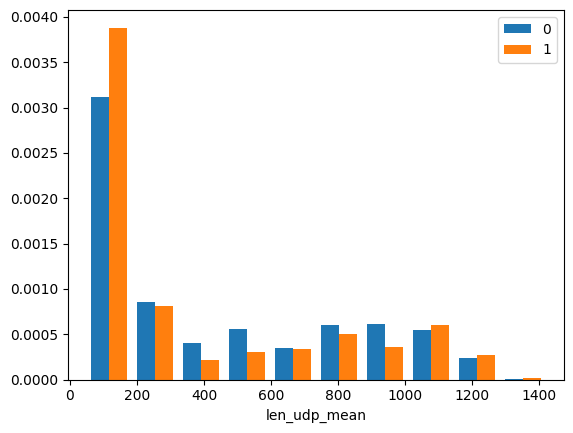

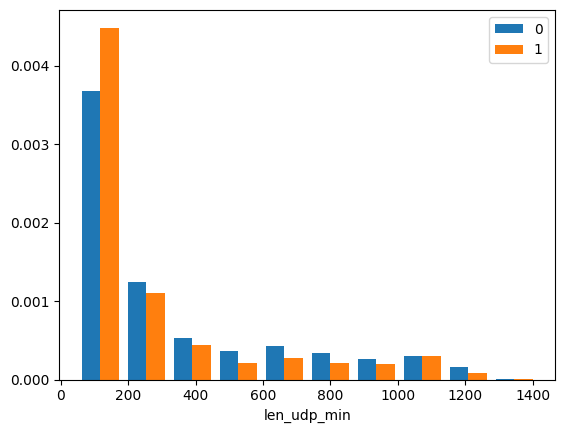

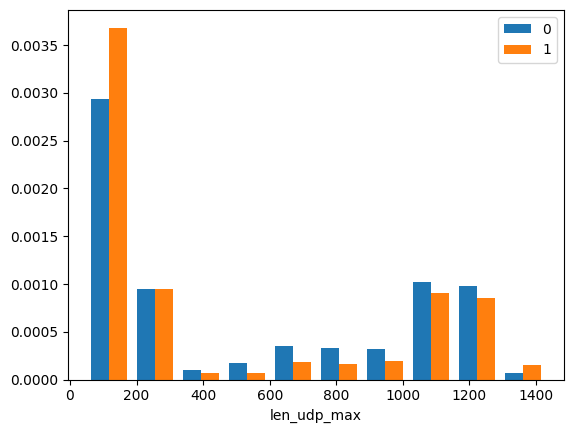

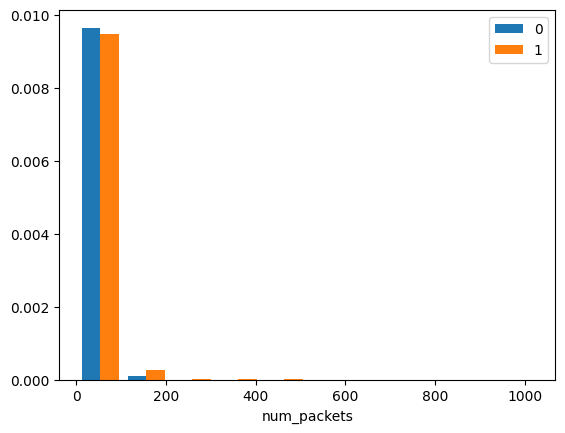

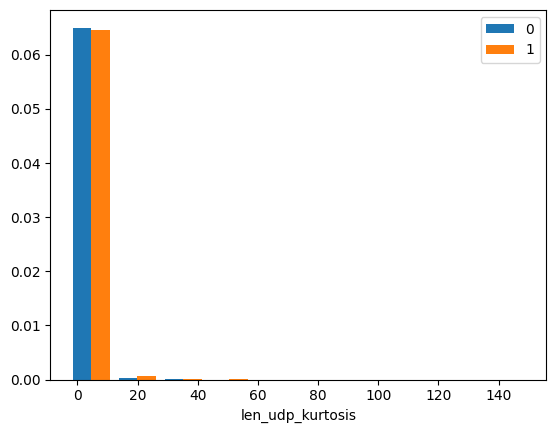

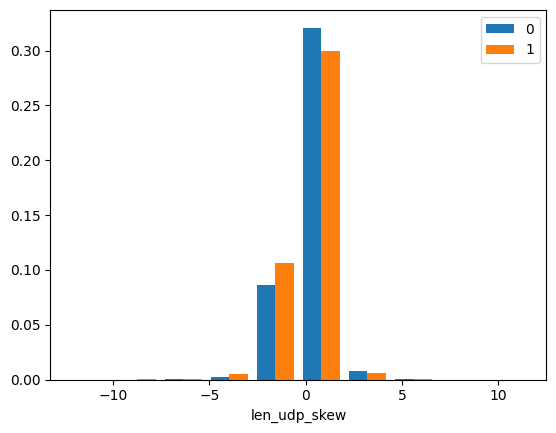

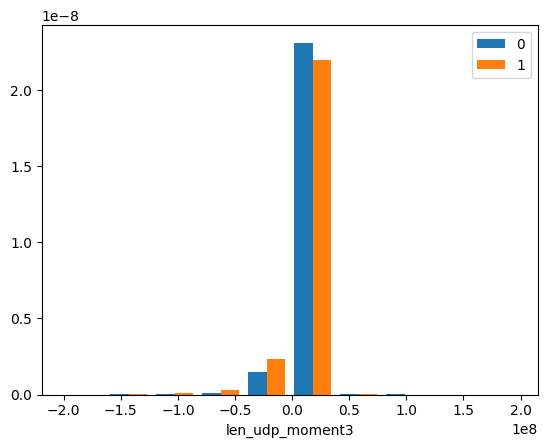

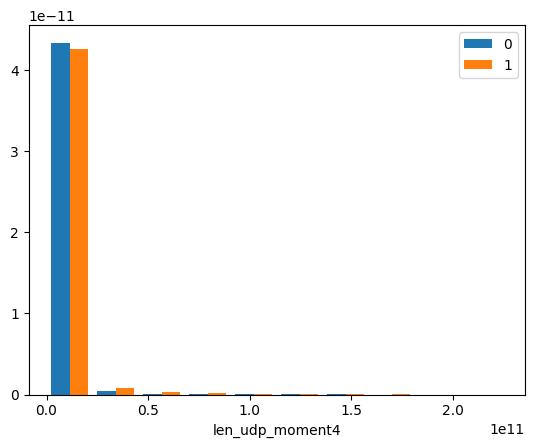

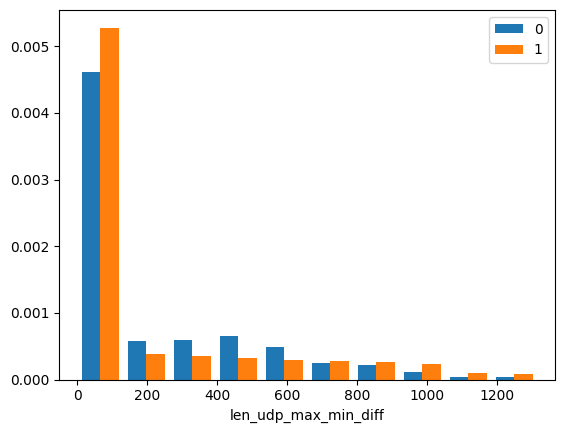

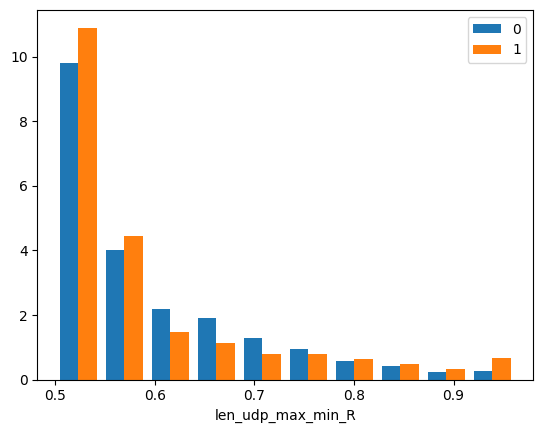

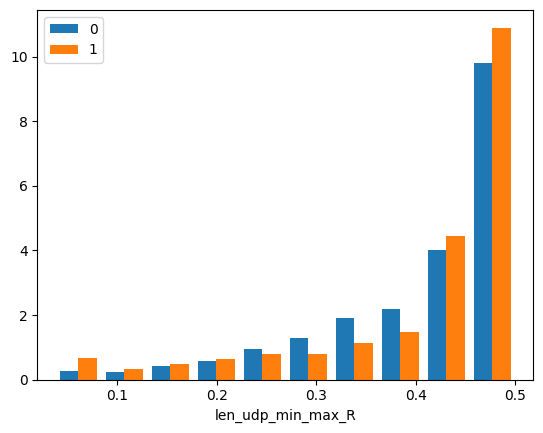

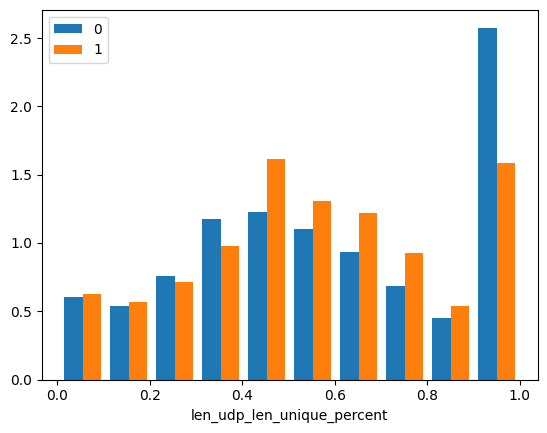

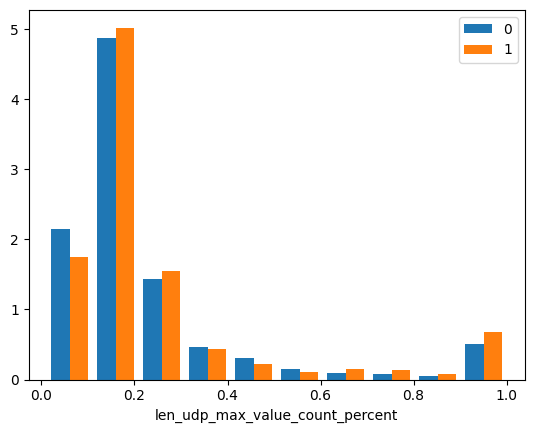

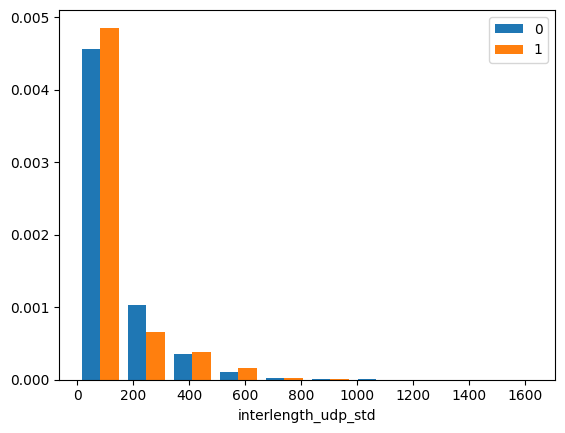

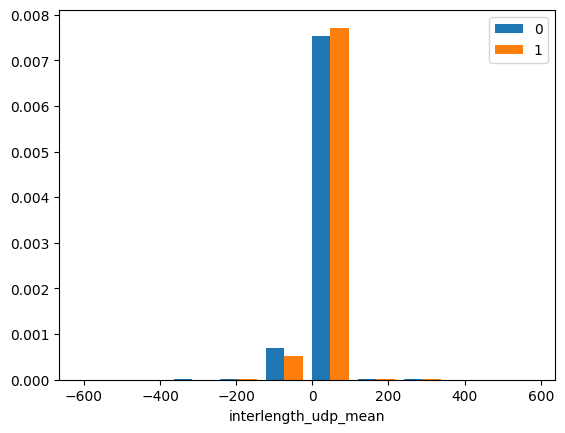

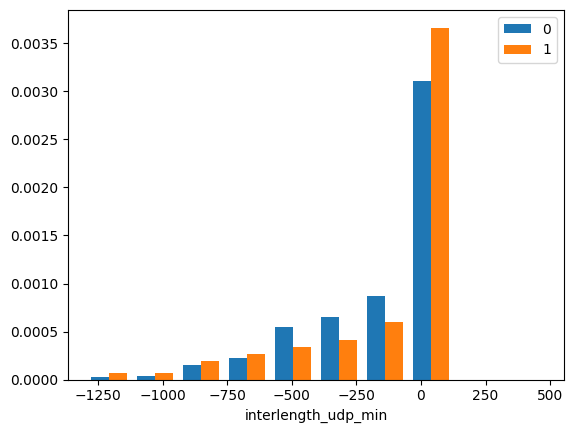

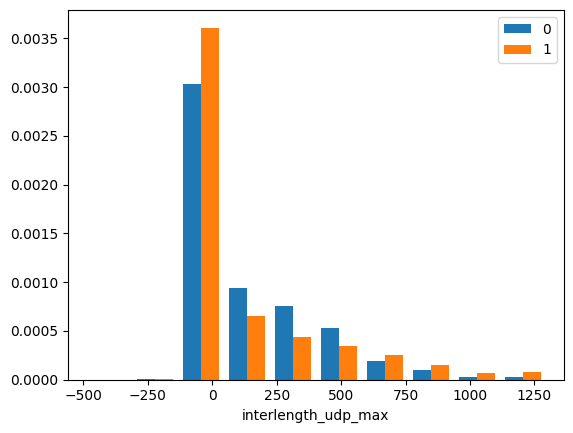

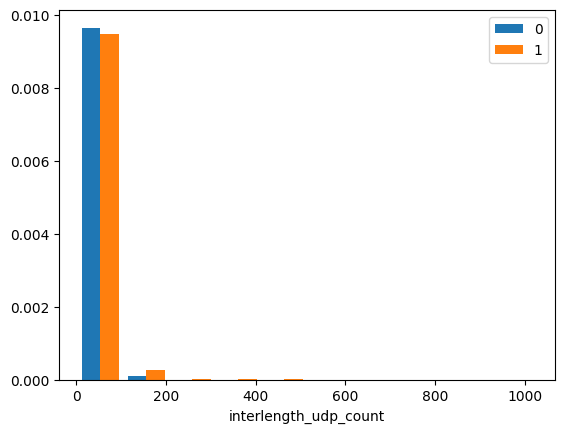

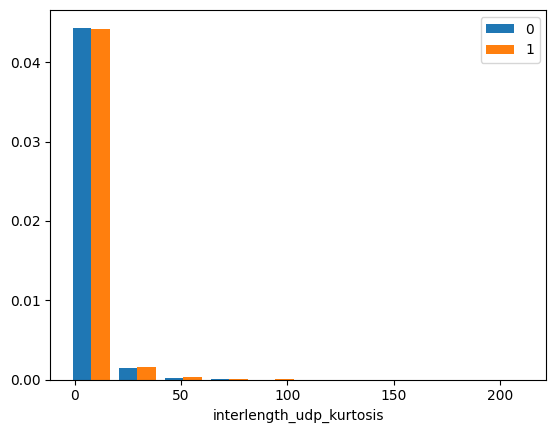

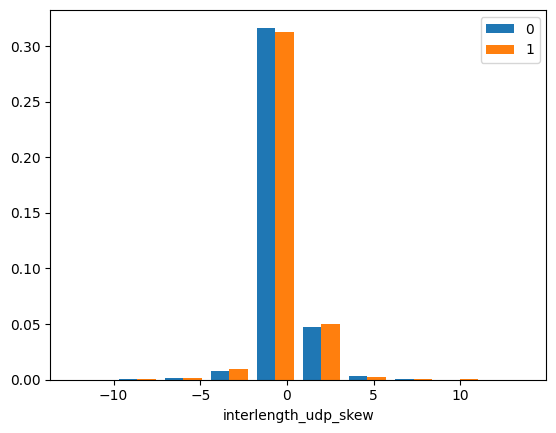

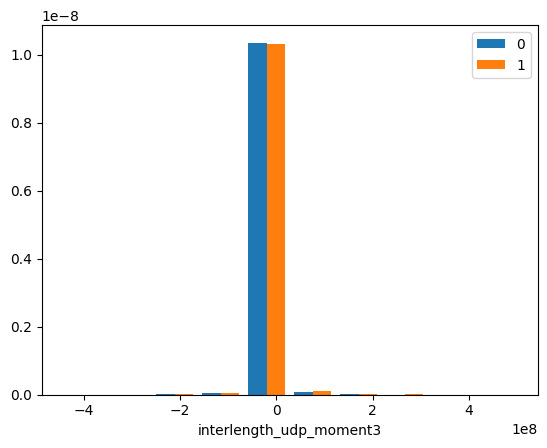

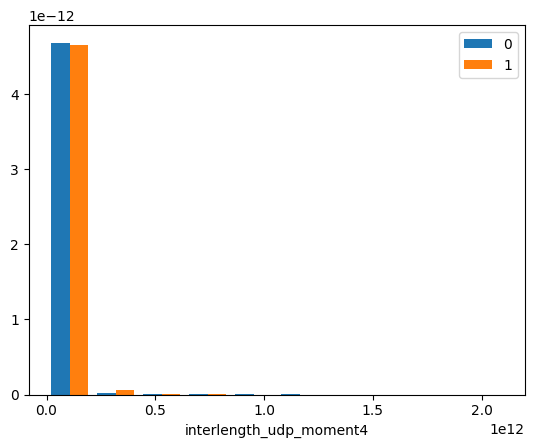

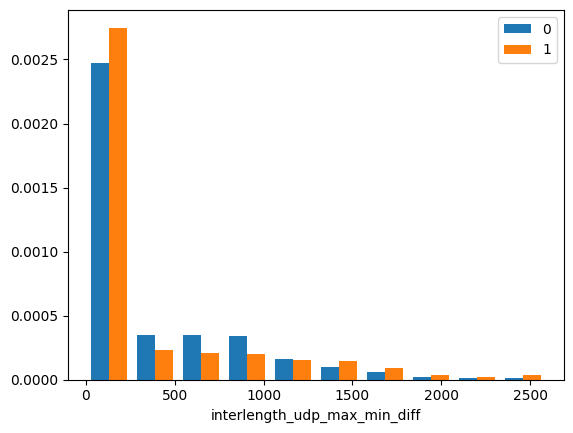

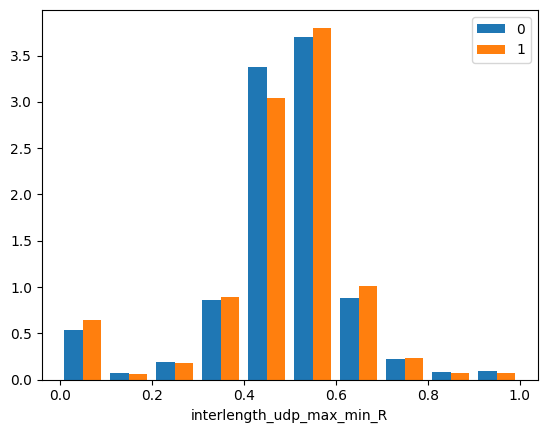

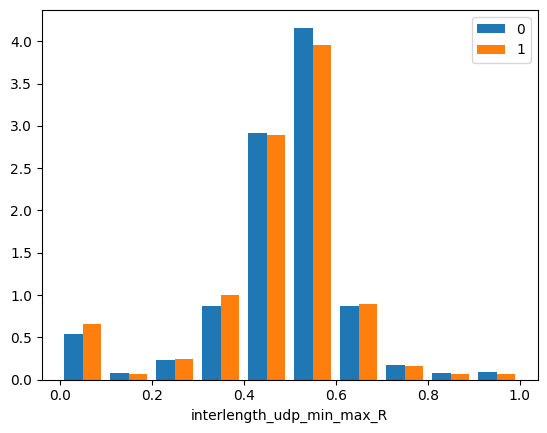

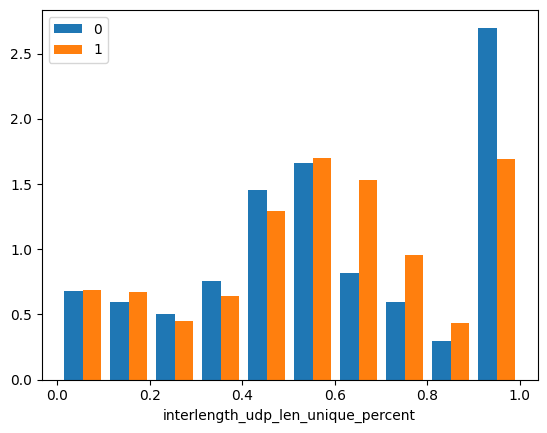

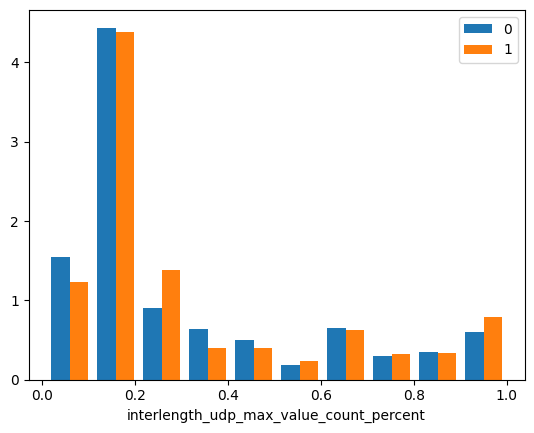

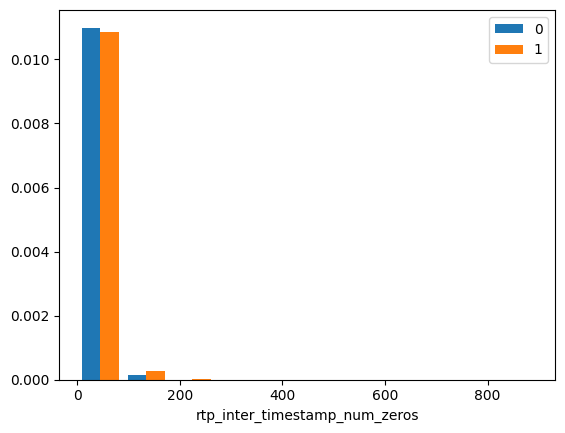

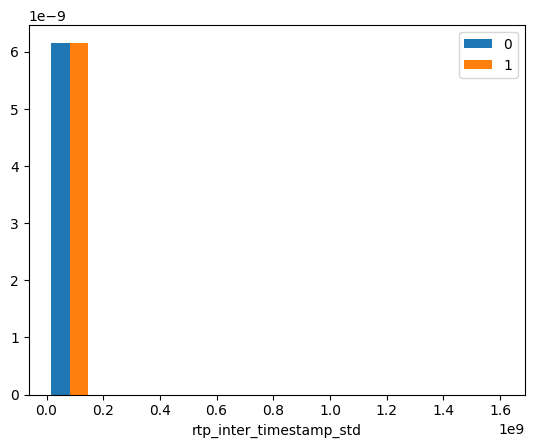

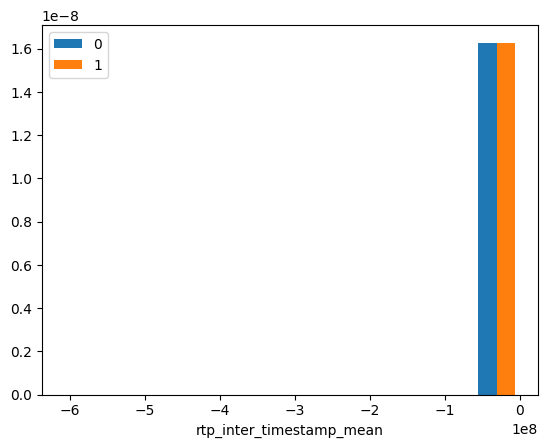

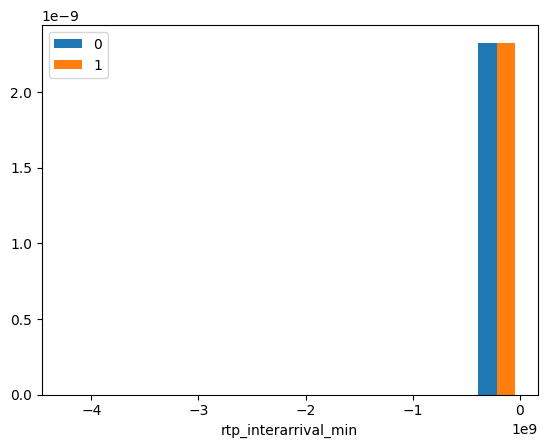

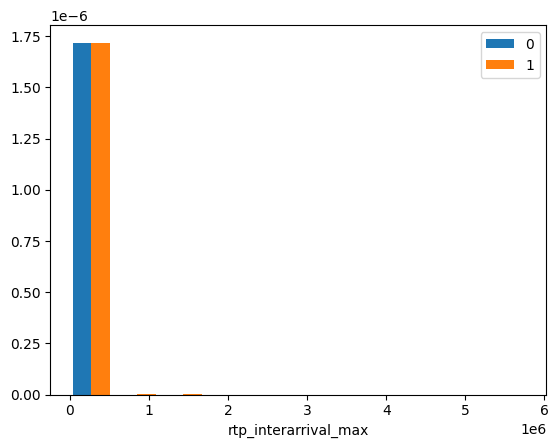

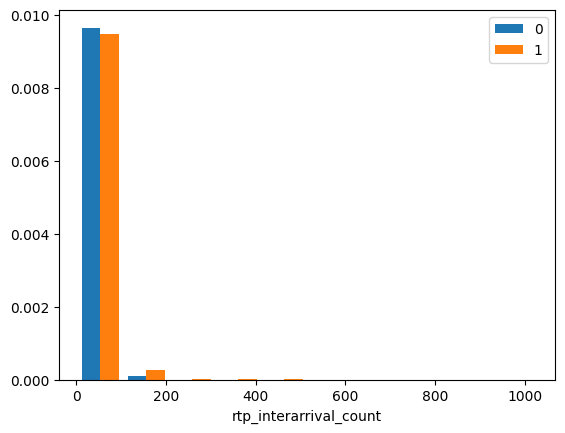

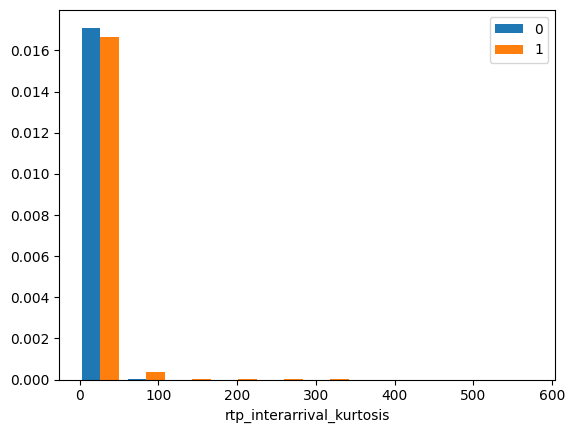

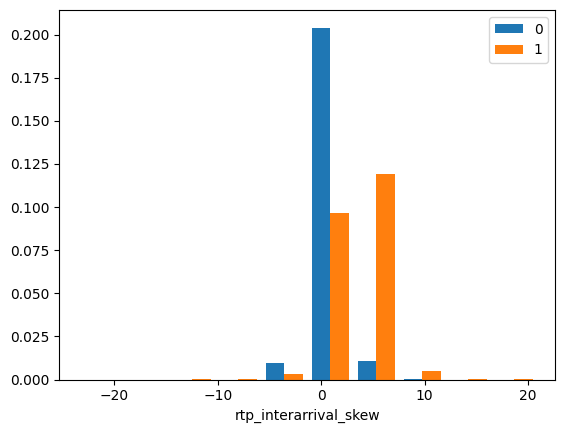

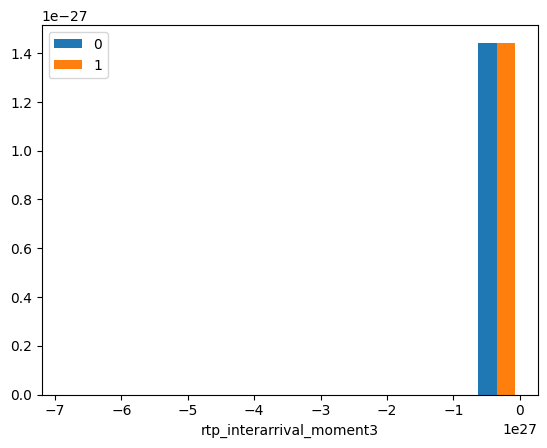

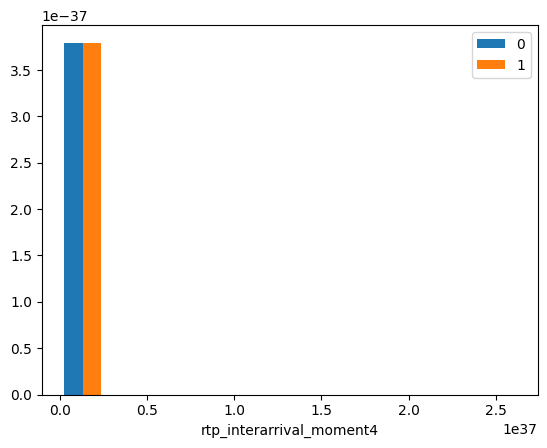

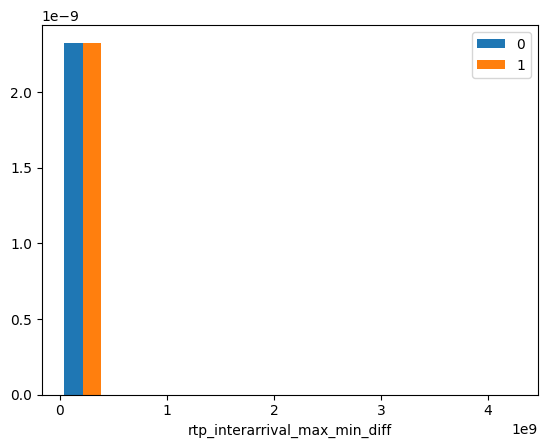

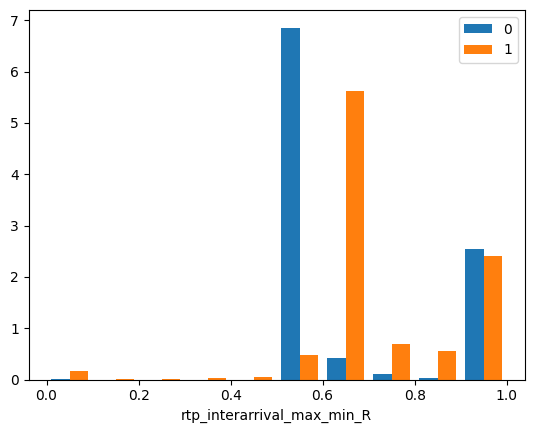

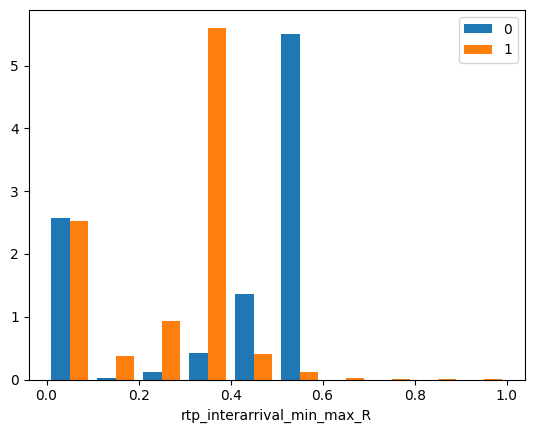

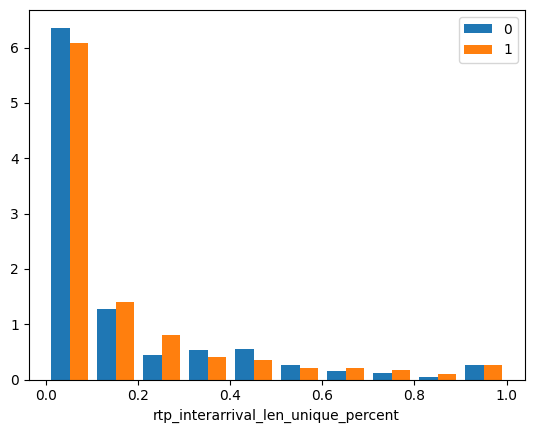

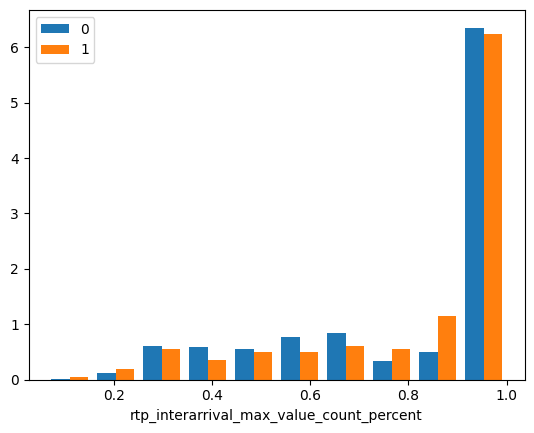

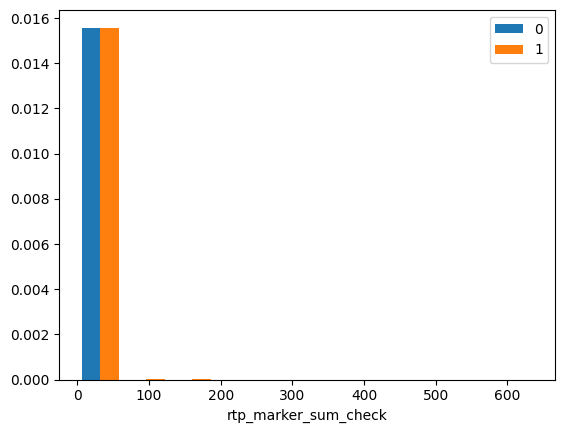

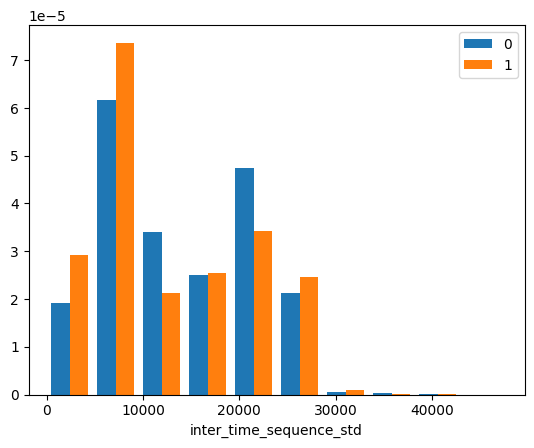

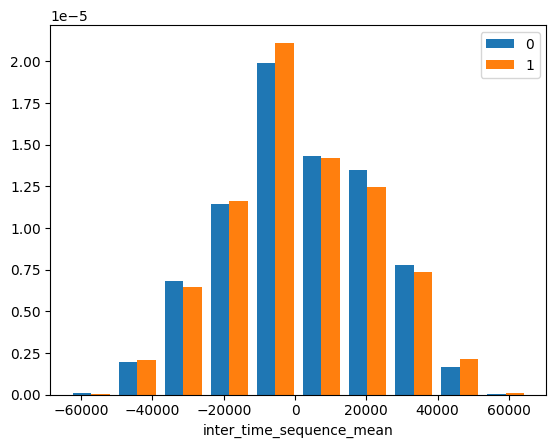

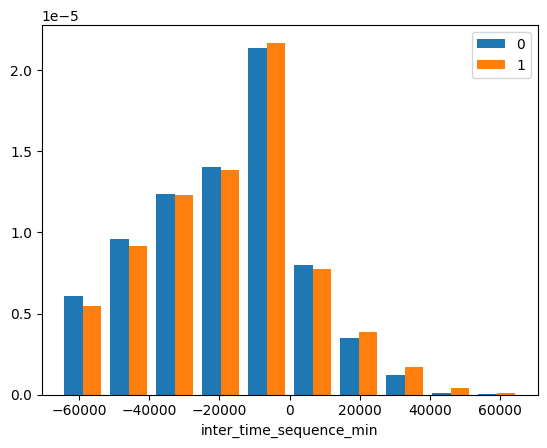

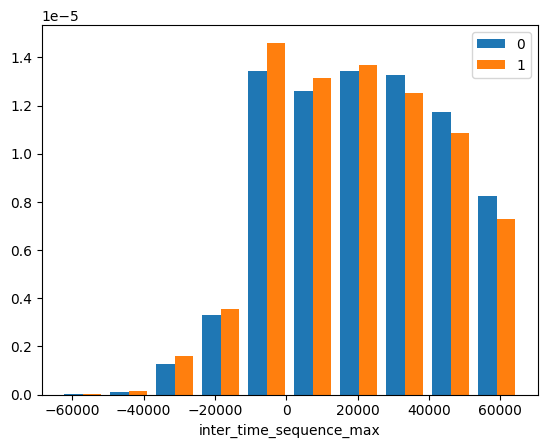

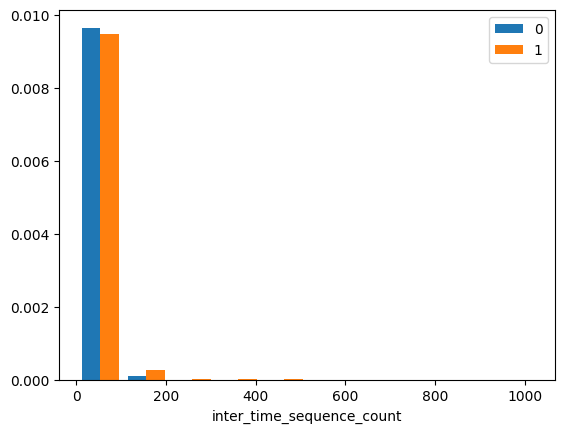

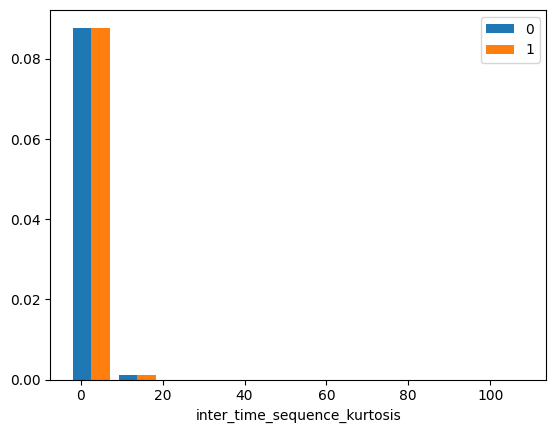

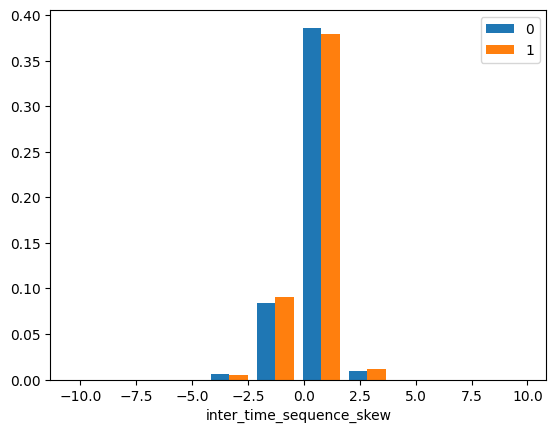

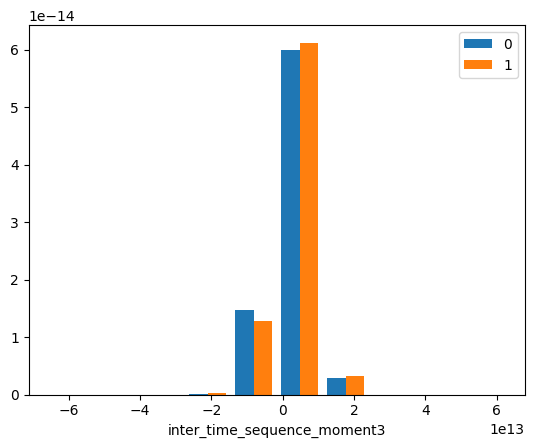

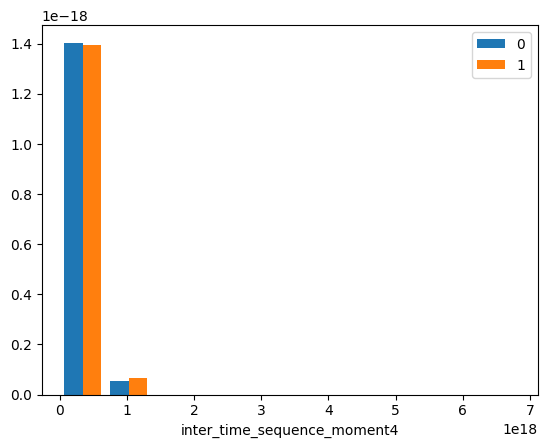

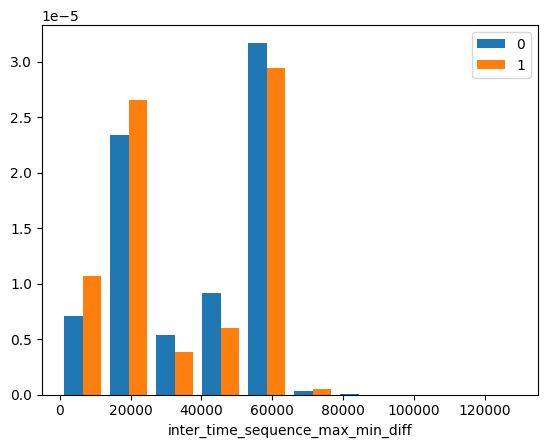

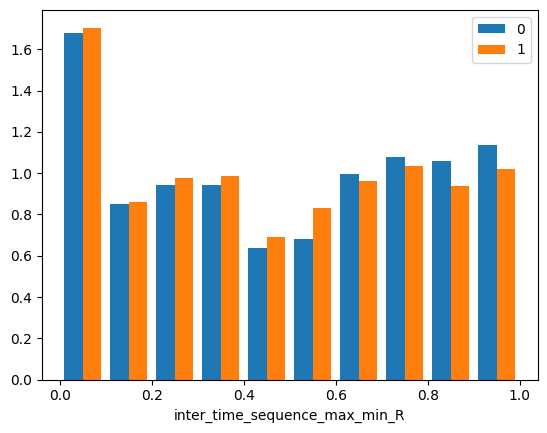

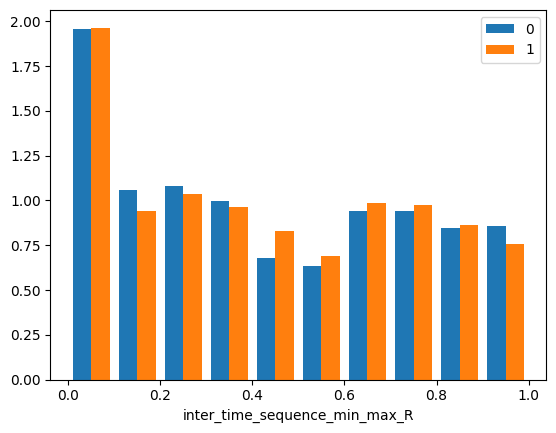

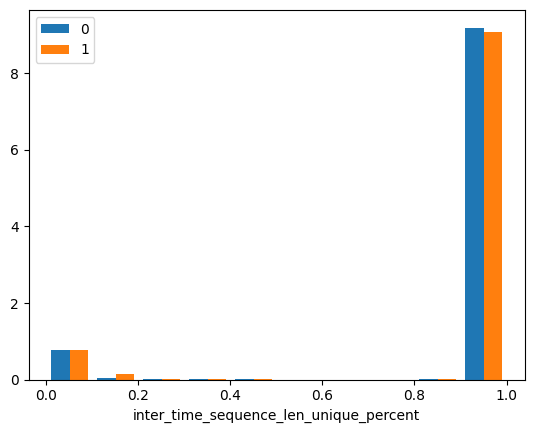

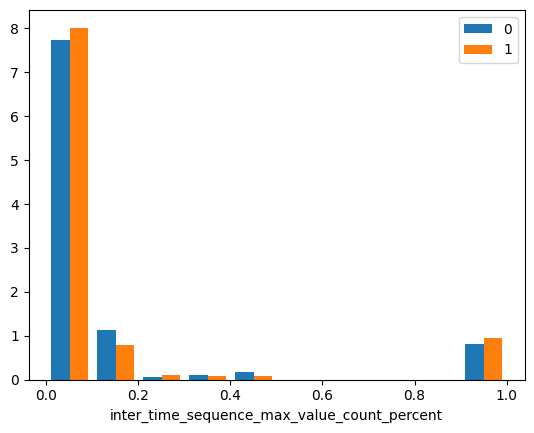

In [38]:
array_1=df['label']==0
array_2=df['label']==1
for i in stat_feat:
    plt.figure()
    plt.hist([np.array(df[array_1][i]), np.array(df[array_2][i])], density=True)
    plt.xlabel(i)
    plt.legend(['0','1'])
    plt.show()

In [49]:
max_loss=df_lossy['num_packet_loss'].max()
df_lossy.loc[767883,['num_packet_loss','num_packets']]

num_packet_loss    5771
num_packets         179
Name: 767883, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

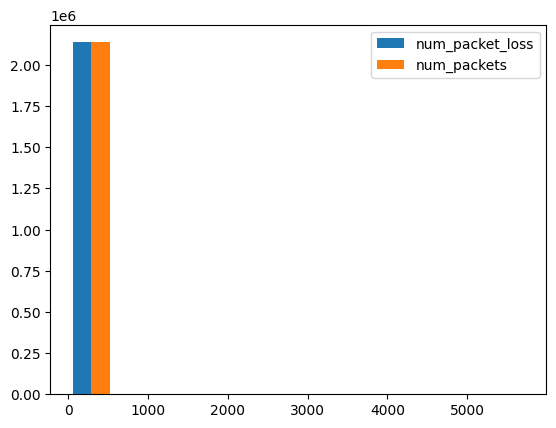

In [51]:
plt.figure()
plt.hist([np.array(df['num_packet_loss']), np.array(df['num_packets'])])
plt.legend(['num_packet_loss','num_packets'])
plt.show

[(0.0, 9.0)]

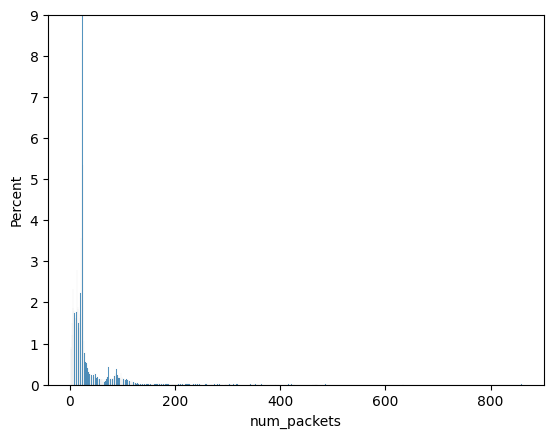

In [62]:
z=sns.histplot(data=df[array_2],x='num_packets',stat='percent')
z.set(ylim=(0, 9))

In [4]:
array_2=df['label']==1
df[array_2]['num_packet_loss'].value_counts().head(11)

num_packet_loss
1     21676
2      4545
3      1779
4       880
5       560
6       430
7       313
8       227
9       201
10      160
11      136
Name: count, dtype: int64

In [87]:
print(df[array_2]['num_packets'].describe())
print(df[array_2]['num_packet_loss'].describe())

count    32479.000000
mean        29.409095
std         29.873316
min          2.000000
25%         16.000000
50%         24.000000
75%         25.000000
max        859.000000
Name: num_packets, dtype: float64
count    32479.000000
mean         6.680317
std         88.938493
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5771.000000
Name: num_packet_loss, dtype: float64


In [5]:
df_copy=df[array_2]
df_copy['new']=df[array_2]['num_packet_loss']/df[array_2]['num_packets']*100
print(df_copy['new'].describe())
df_copy[df_copy['new']>100]

count    32479.000000
mean        24.743420
std        178.704298
min          0.273973
25%          4.166667
50%          4.347826
75%         12.500000
max      13866.666667
Name: new, dtype: float64


C:\Users\utente\AppData\Local\Temp\ipykernel_17612\249799209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['new']=df[array_2]['num_packet_loss']/df[array_2]['num_packets']*100


,timestamp,interarrival_std,interarrival_mean,interarrival_min,interarrival_max,interarrival_count,interarrival_kurtosis,interarrival_skew,interarrival_moment3,interarrival_moment4,...,software,ssrc,ip_src,ip_dst,prt_src,prt_dst,p_type,n_call,label,new
19195,2020-12-14 14:59:19.000,0.020925,0.009054,0.000000e+00,0.096948,38,7.884997,2.885372,0.000025,1.978472e-06,...,webrtc,0x1662dbe0,130.61.36.196,192.168.1.126,10000,39094,100,2,1,136.842105
19210,2020-12-14 14:59:26.500,0.014314,0.008871,0.000000e+00,0.059930,56,3.545157,2.054084,0.000006,2.650718e-07,...,webrtc,0x1662dbe0,130.61.36.196,192.168.1.126,10000,39094,100,2,1,176.785714
34510,2020-12-14 14:34:12.000,0.066144,0.049534,1.425743e-04,0.170142,10,-0.197417,1.240191,0.000306,4.345285e-05,...,webrtc,0x73ee401c,130.61.36.196,192.168.1.126,10000,39094,111,2,1,140.000000
34511,2020-12-14 14:34:12.500,0.050911,0.043209,5.166531e-03,0.161427,9,1.240702,1.567837,0.000173,2.251013e-05,...,webrtc,0x73ee401c,130.61.36.196,192.168.1.126,10000,39094,111,2,1,122.222222
34515,2020-12-14 14:34:14.500,0.065030,0.047484,4.768372e-07,0.160767,11,-0.897178,1.000223,0.000238,3.107901e-05,...,webrtc,0x73ee401c,130.61.36.196,192.168.1.126,10000,39094,111,2,1,136.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2103760,2020-05-13 14:44:17.000,0.146339,0.101754,9.536743e-07,0.323371,5,-1.121291,0.744810,0.001670,5.514102e-04,...,webex,0x1e5bc67e,69.26.161.95,192.168.1.94,5004,56813,117,69,1,120.000000
2104476,2020-05-13 14:33:50.000,0.066011,0.040275,0.000000e+00,0.204382,13,1.105671,1.566262,0.000400,6.642326e-05,...,webex,0x48528151,69.26.161.95,192.168.1.94,5004,56813,117,69,1,107.692308
2112540,2020-05-13 14:02:22.000,0.053271,0.258261,2.205930e-01,0.295929,2,-2.000000,0.000000,0.000000,2.013213e-06,...,webex,0x80a13b78,69.26.161.95,192.168.1.94,5004,56813,117,69,1,150.000000
2117627,2020-05-13 14:33:50.000,0.014960,0.006965,0.000000e+00,0.109386,78,26.878571,4.564642,0.000015,1.458302e-06,...,webex,0x926e89d4,69.26.161.95,192.168.1.94,5004,56813,117,69,1,130.769231


In [6]:
df_copy=df_copy[df_copy['new']<100]
df_copy['new'].describe()

count    30820.000000
mean        10.140958
std         13.534644
min          0.273973
25%          4.166667
50%          4.347826
75%         10.000000
max         99.421965
Name: new, dtype: float64

(array([1.3080e+03, 1.5370e+03, 1.2080e+03, 1.0863e+04, 3.0550e+03,
        8.7000e+02, 1.2300e+03, 6.2600e+02, 2.0530e+03, 5.7000e+02,
        5.1100e+02, 1.3200e+02, 6.6900e+02, 1.0810e+03, 8.7000e+01,
        1.9800e+02, 5.6200e+02, 2.1200e+02, 1.6200e+02, 4.8700e+02,
        5.5000e+01, 1.7200e+02, 8.7000e+01, 6.2000e+01, 4.1200e+02,
        1.1000e+01, 1.6400e+02, 2.6000e+01, 1.2100e+02, 7.6000e+01,
        5.2000e+01, 5.4000e+01, 5.0000e+00, 3.3800e+02, 4.5000e+01,
        3.5000e+01, 4.2000e+01, 5.8000e+01, 5.0000e+01, 1.3000e+02,
        4.0000e+01, 3.2000e+01, 6.2000e+01, 2.0000e+01, 6.4000e+01,
        3.7000e+01, 2.0000e+01, 1.8000e+01, 3.0000e+00, 2.9300e+02,
        1.0000e+00, 5.0000e+00, 2.5000e+01, 2.2000e+01, 1.4000e+01,
        4.6000e+01, 3.3000e+01, 2.2000e+01, 1.6000e+01, 5.5000e+01,
        5.0000e+00, 7.0000e+00, 3.4000e+01, 1.6000e+01, 1.0000e+01,
        3.0000e+00, 8.4000e+01, 3.0000e+00, 2.1000e+01, 1.3000e+01,
        6.0000e+00, 2.9000e+01, 2.7000e+01, 5.00

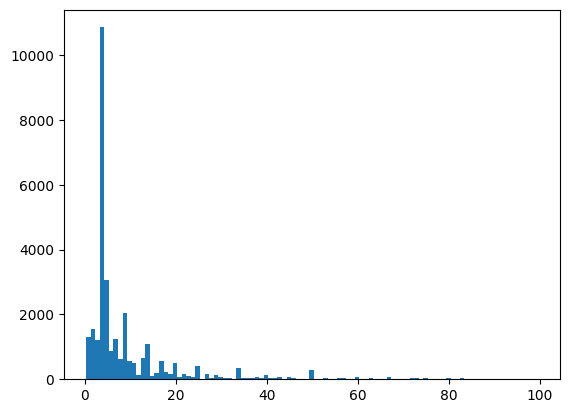

In [8]:
plt.hist(df_copy['new'], bins=99)

### <ins>Point 4.</ins>

[(-0.1, 60.0)]

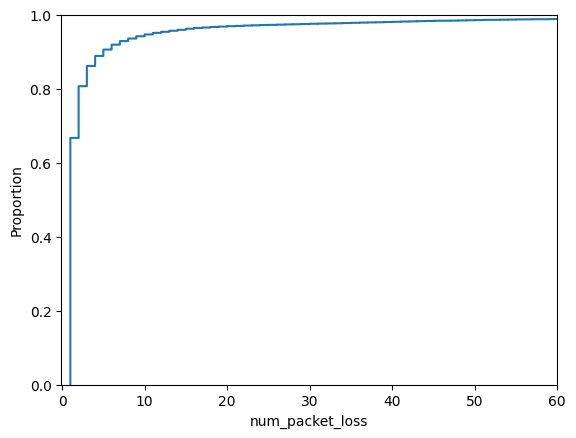

In [35]:
#correct ECDF
array_2=df['label']==1
df_lossy=df[array_2]

g=sns.ecdfplot(
    data = df_lossy,
    x = 'num_packet_loss' 
)
g.set(xlim=(-.1, 60))

### <ins>Point 5.</ins>

In [4]:
filt_webex=df['software']=='webex'
filt_webrtc=df['software']=='webrtc'
# Number of calls
num_calls_webex=len(set(df[filt_webex]['n_call']))
print(num_calls_webex)
num_calls_webrtc=len(set(df[filt_webrtc]['n_call']))
print(num_calls_webrtc)
# Number of time windows
C_webex=df[filt_webex]['n_call'].value_counts()
len(C_webex)
num_time_window_webex=C_webex.sum()
C_webrtc=df[filt_webrtc]['n_call'].value_counts()
len(C_webrtc)
num_time_window_webrtc=C_webrtc.sum()
print(num_time_window_webex)
print(num_time_window_webrtc)
# Duration of each video call in seconds
print(C_webex*500e-3) 
print(C_webrtc*500e-3) 
# Average duration of video calls
print(C_webex.sum()*500e-3/num_calls_webex)
print(C_webrtc.sum()*500e-3/num_calls_webrtc)

21
47
807064
1330863
n_call
57    76588.5
67    45447.0
64    41988.5
54    37982.5
61    36781.5
68    26861.5
58    22283.5
69    17155.0
52    15451.5
53    15059.0
56    14210.5
55    11654.5
50     9565.0
51     8419.5
62     6085.5
60     5427.0
63     4195.5
65     3365.5
66     2533.5
49     1942.5
59      534.5
Name: count, dtype: float64
n_call
37    34749.5
44    34174.0
7     32738.0
48    32322.5
19    31594.5
2     31139.5
23    29671.0
29    26638.5
18    26006.0
25    25849.5
35    23712.5
15    22876.0
42    22735.0
28    22313.0
45    17635.5
8     15598.5
20    14904.5
21    14729.0
22    13041.0
33    12793.5
5     11391.0
11    11372.5
9     10243.5
46     9676.5
30     9657.5
41     9587.0
3      9570.0
24     9511.0
31     9491.0
13     8729.5
32     8647.0
47     8267.0
4      7782.0
34     7609.0
17     7490.0
38     6823.5
6      6719.0
27     6314.5
1      5334.5
16     4327.0
43     3919.0
39     1976.5
12     1896.0
36     1834.5
14      740.0
40      656.5

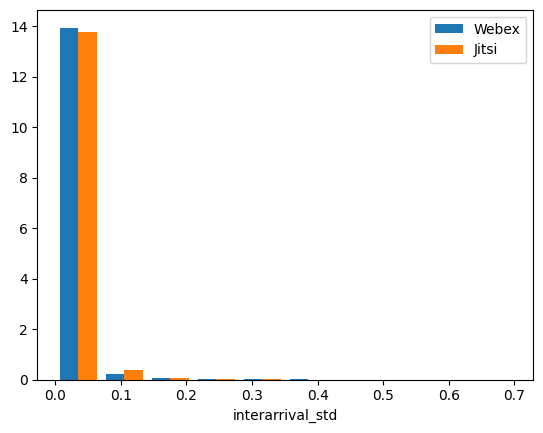

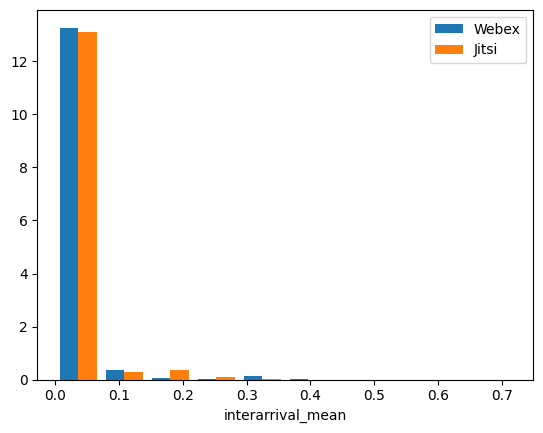

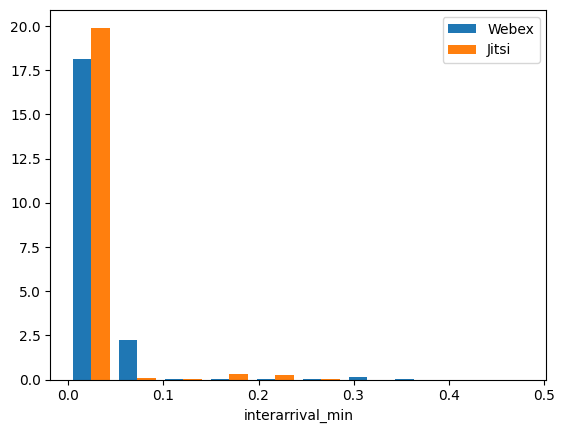

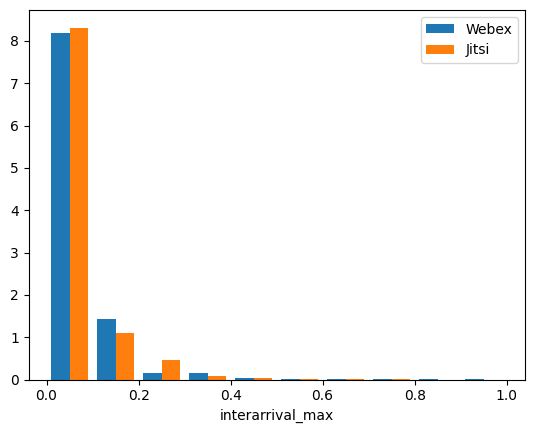

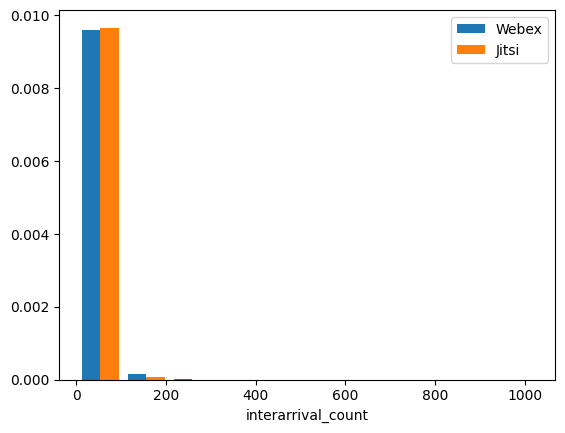

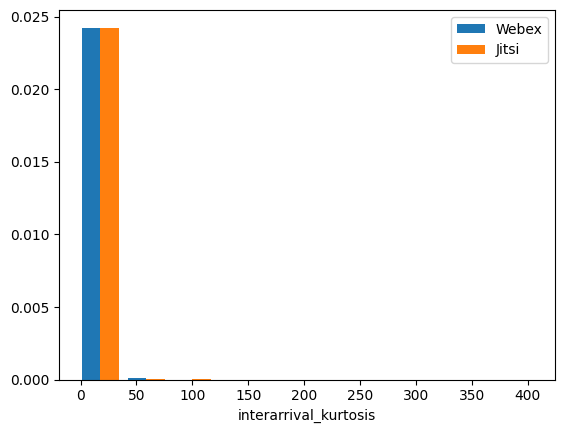

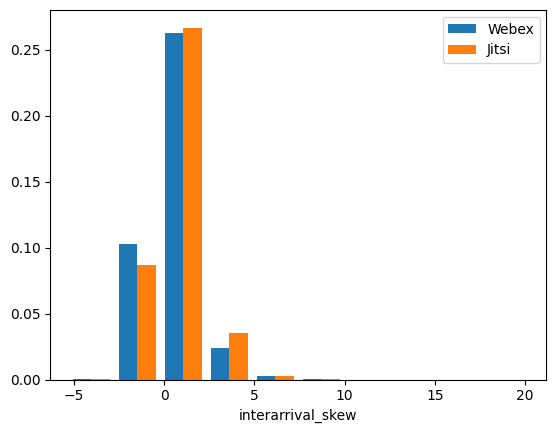

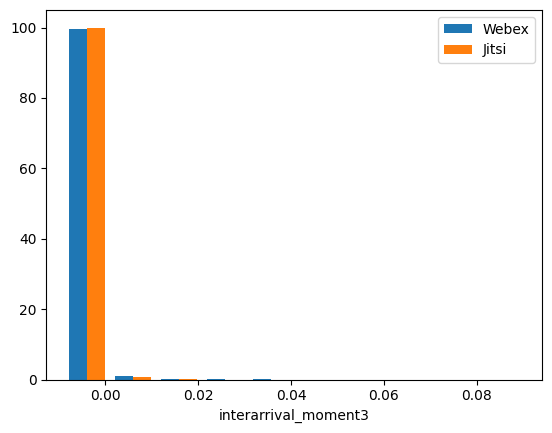

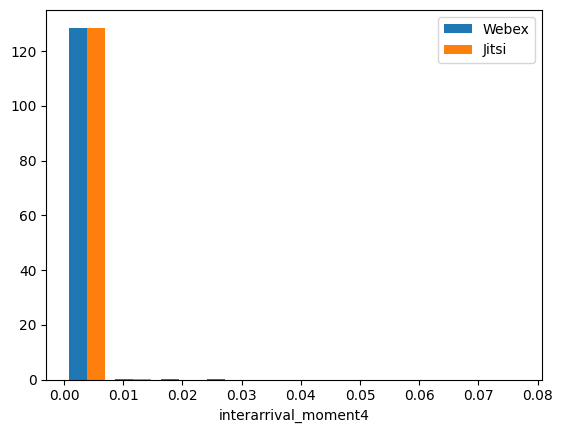

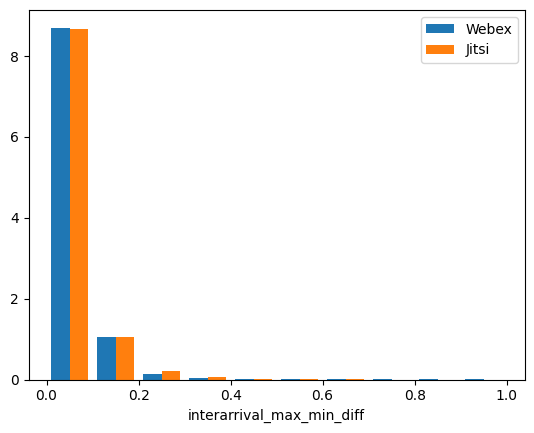

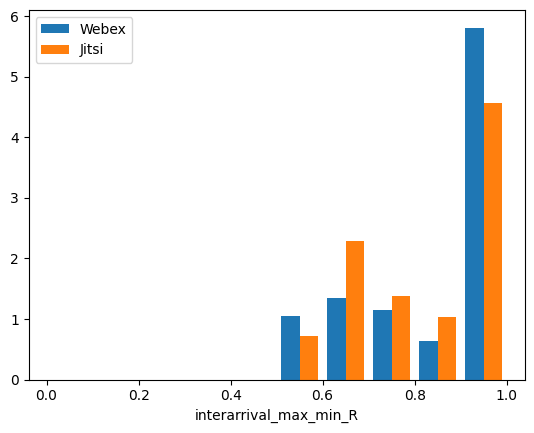

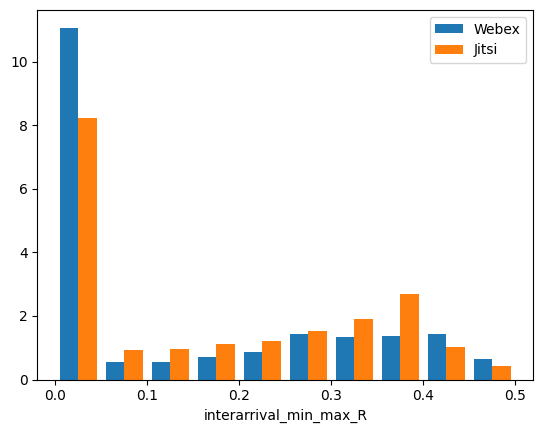

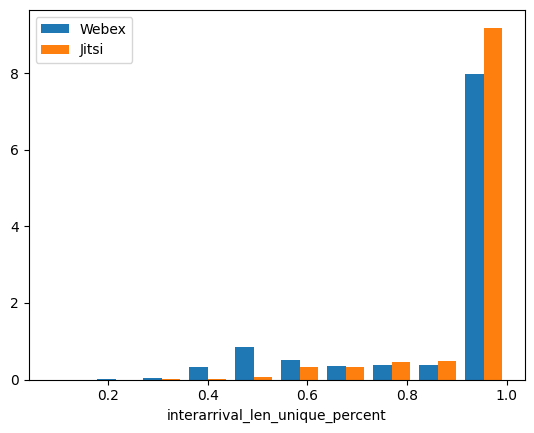

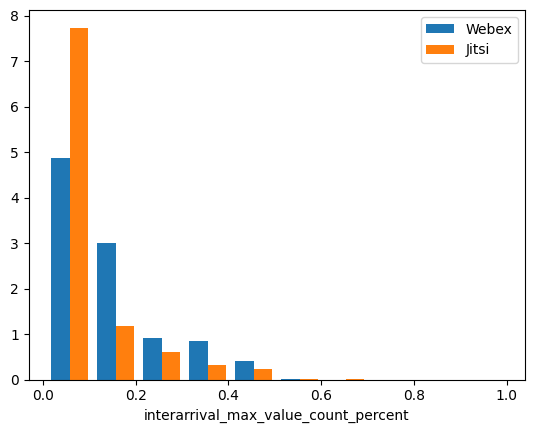

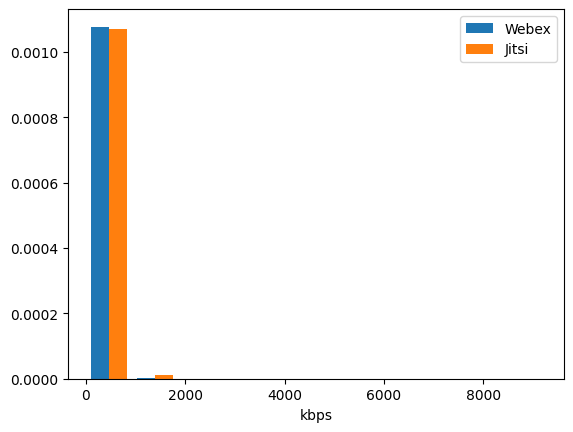

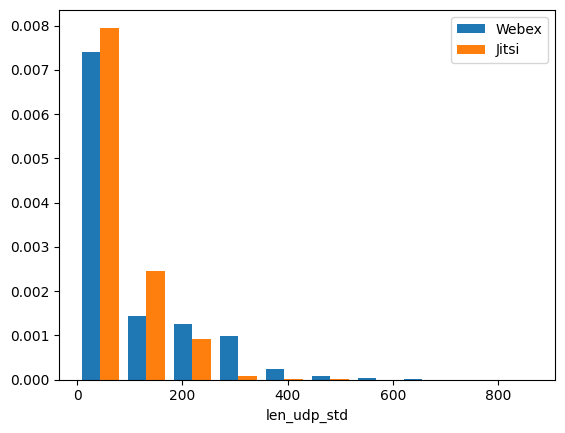

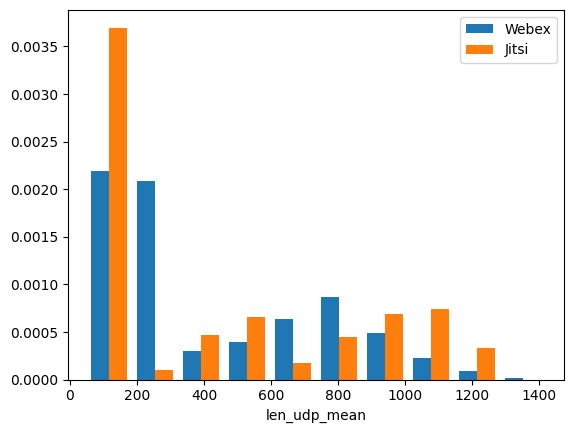

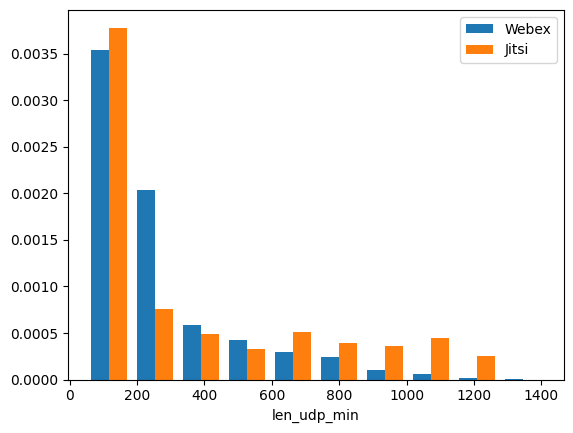

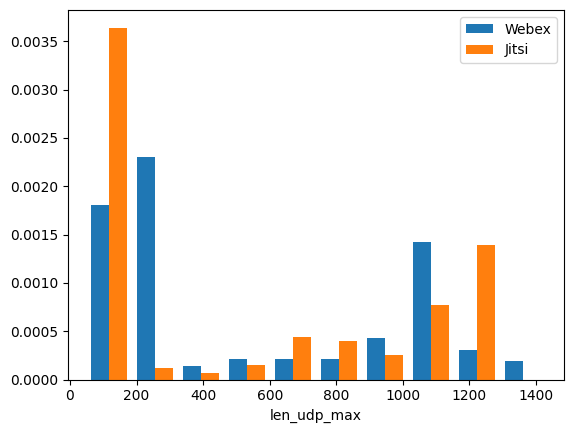

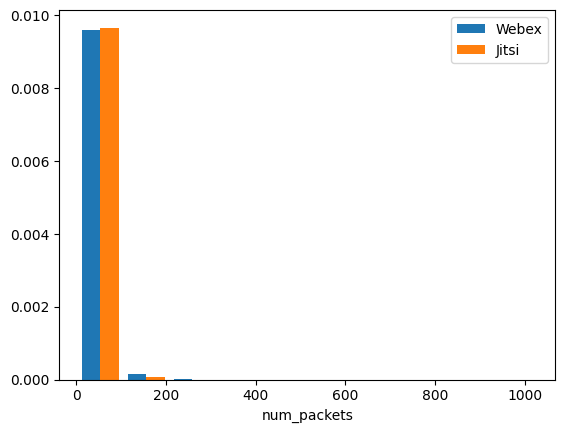

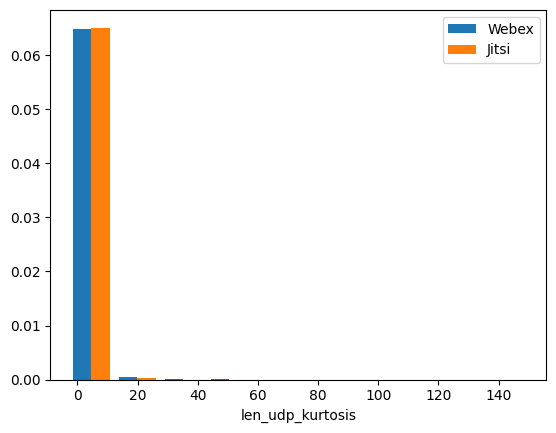

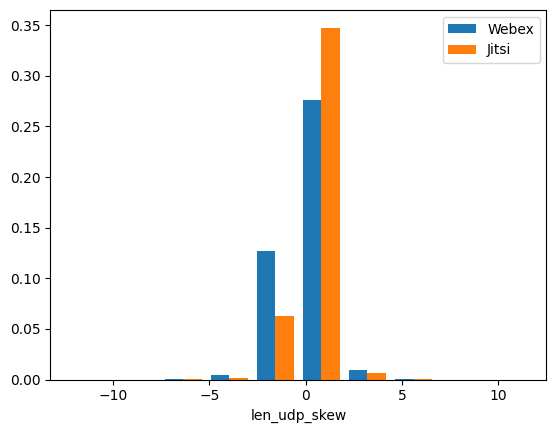

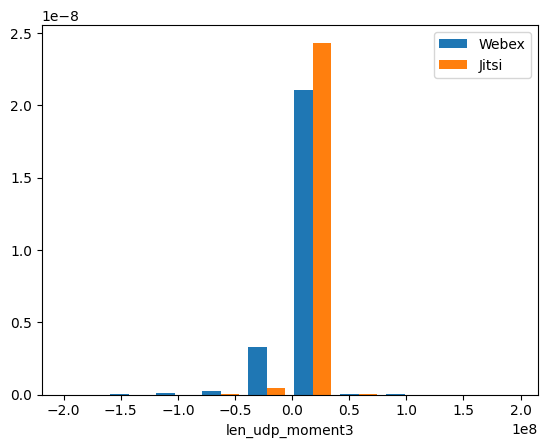

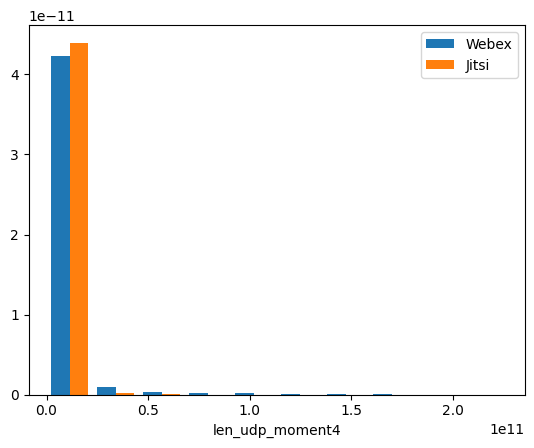

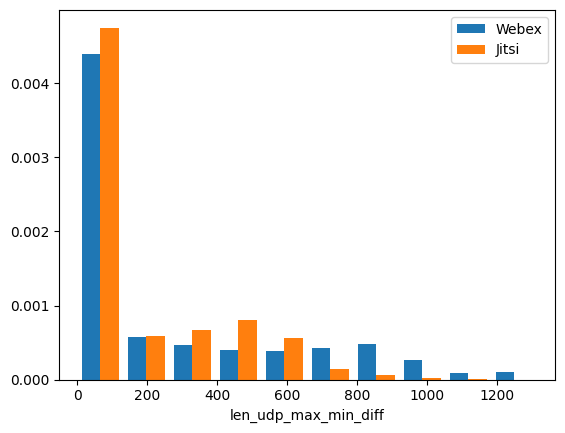

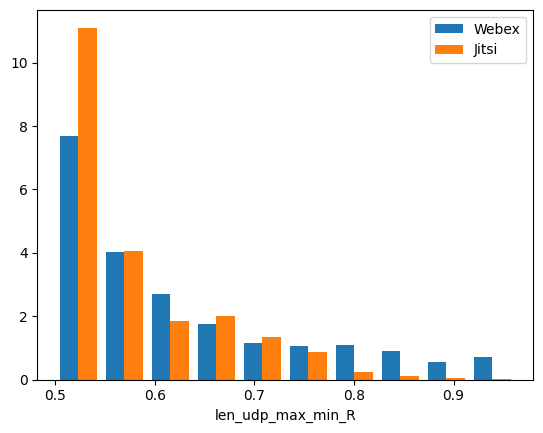

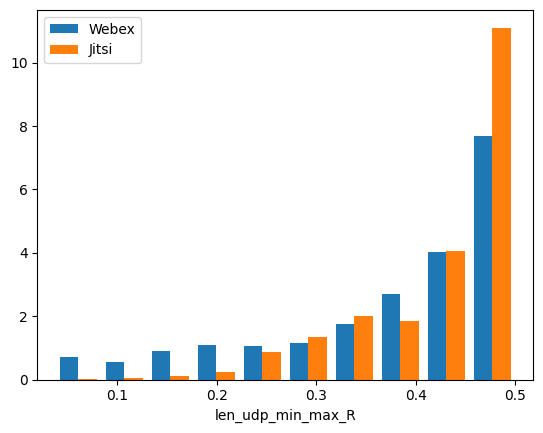

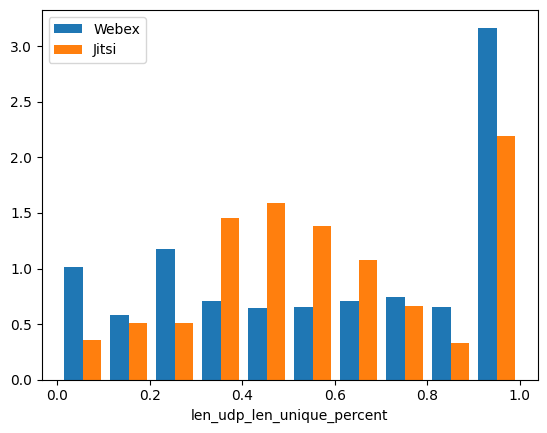

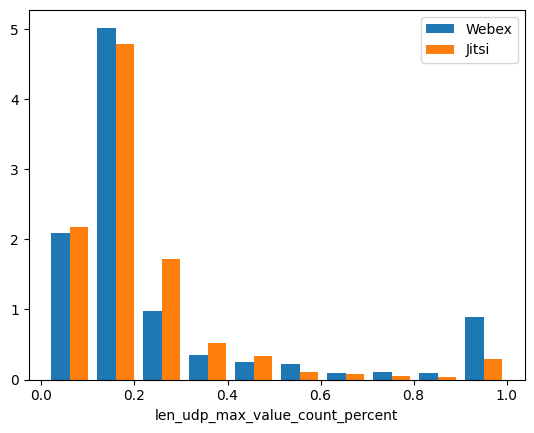

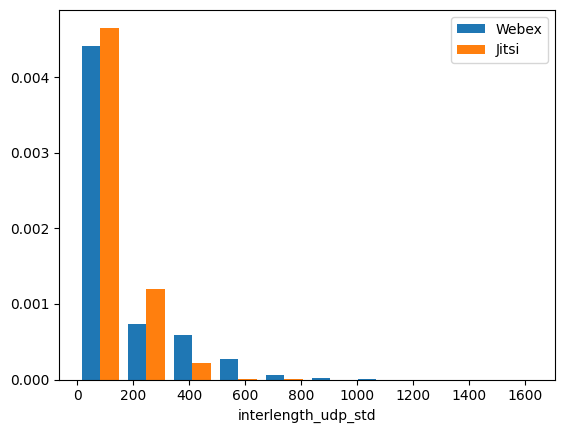

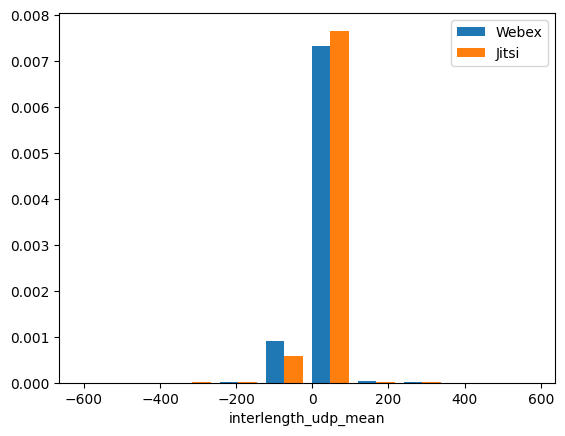

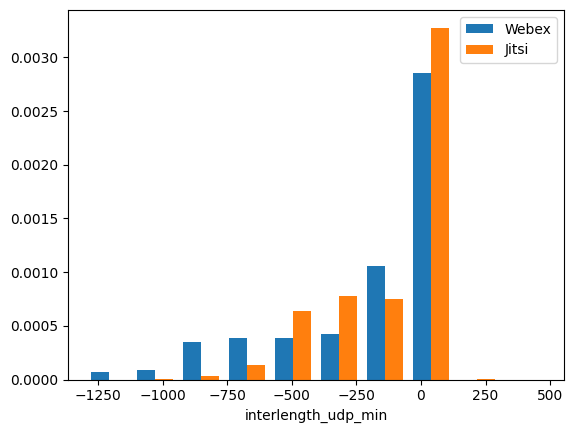

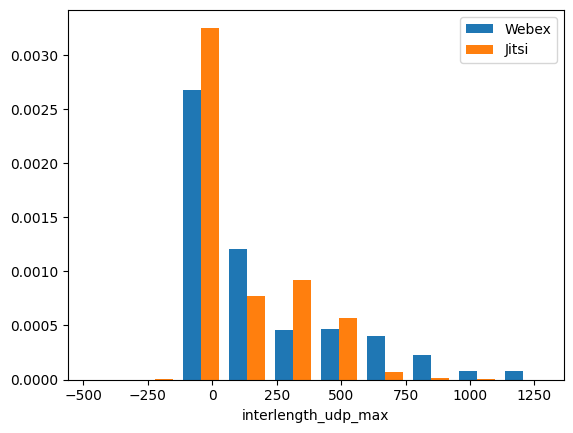

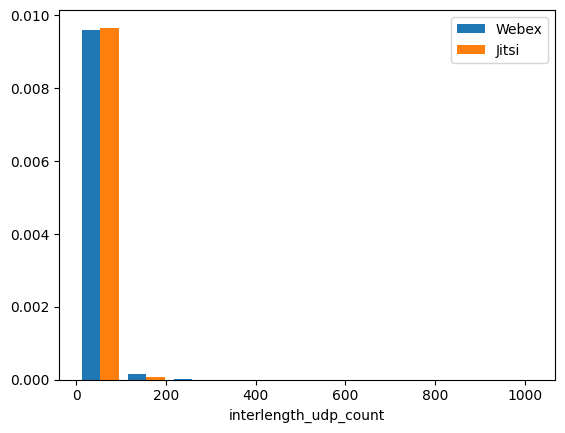

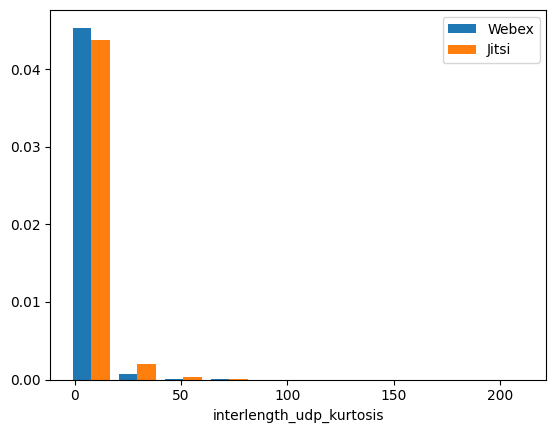

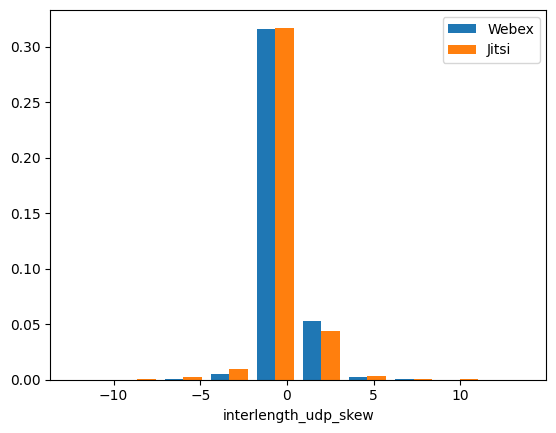

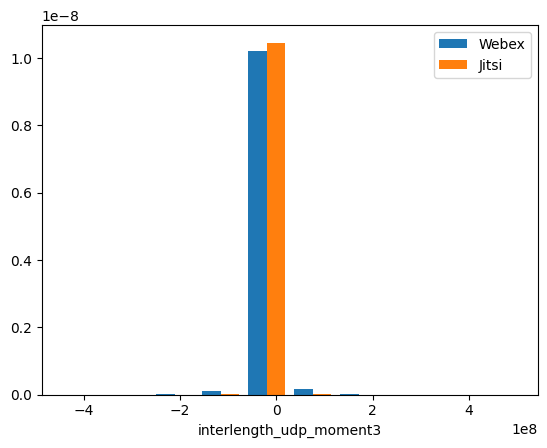

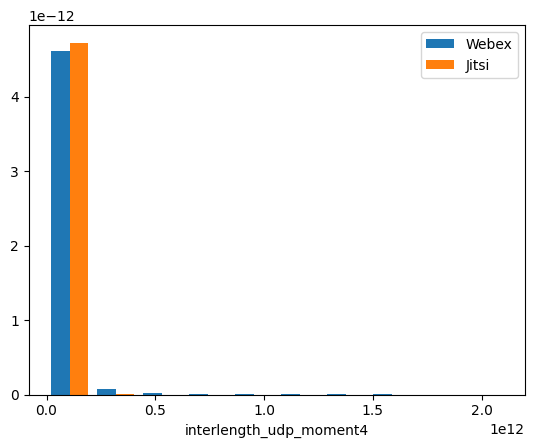

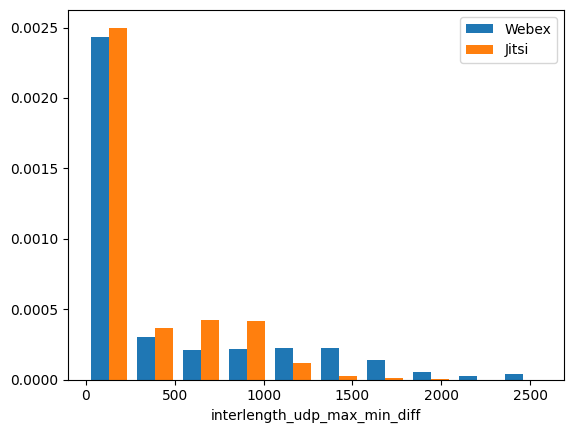

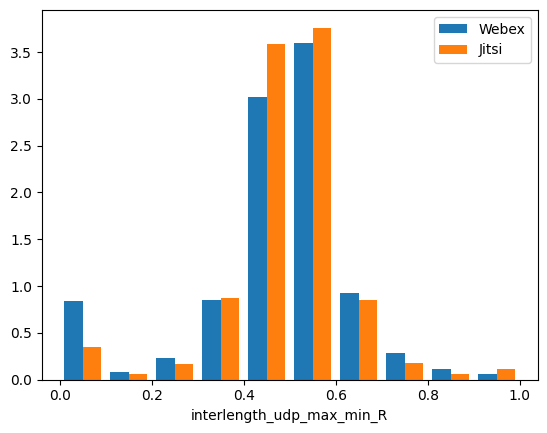

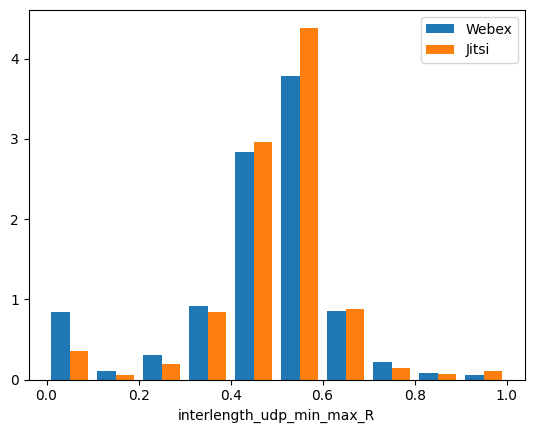

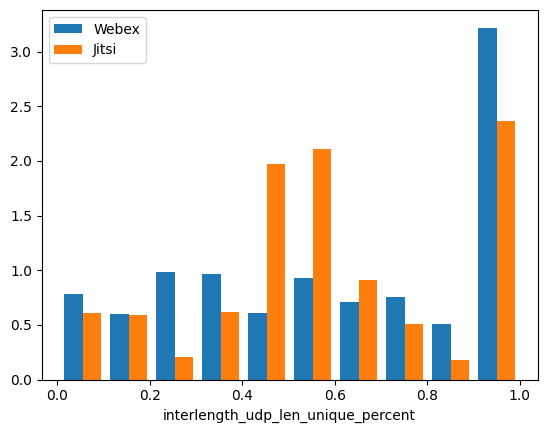

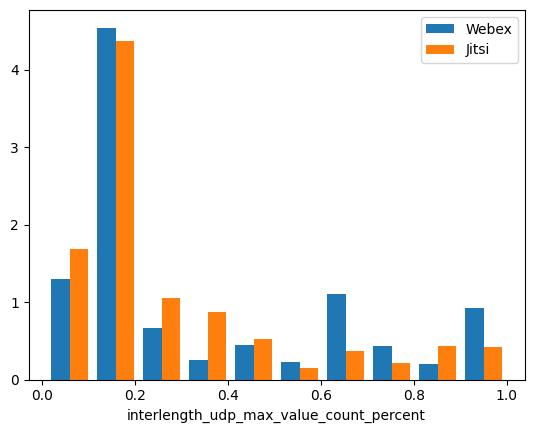

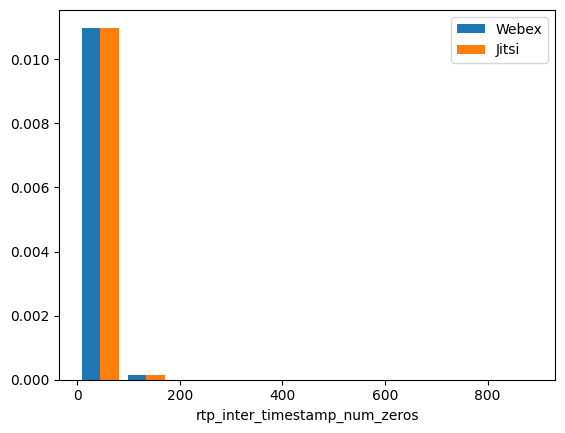

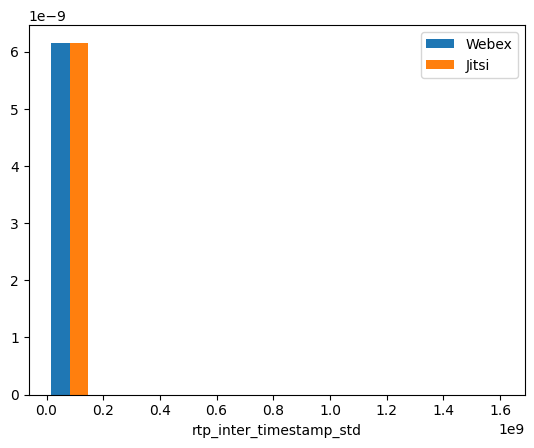

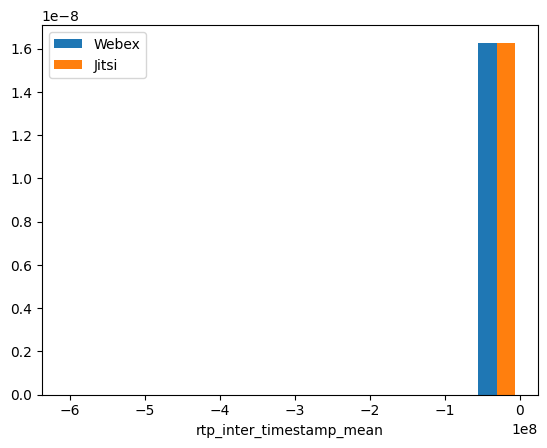

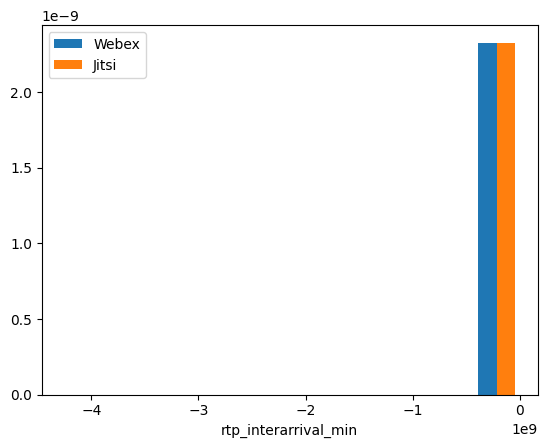

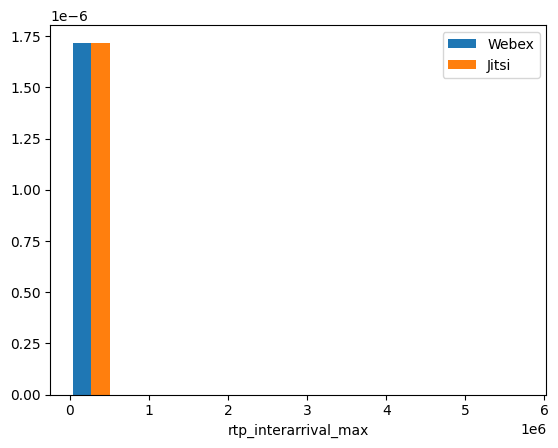

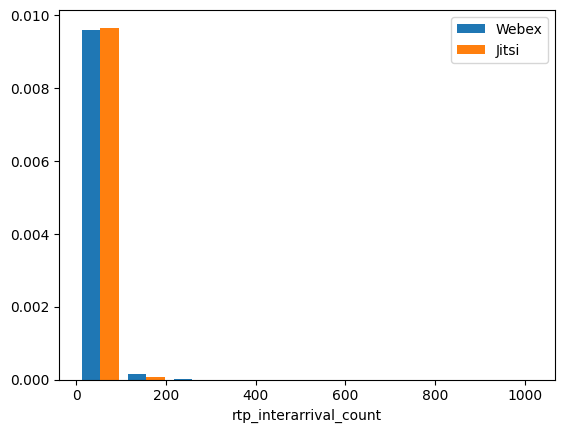

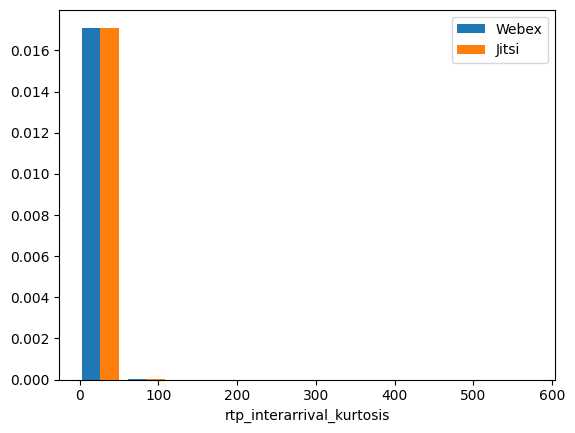

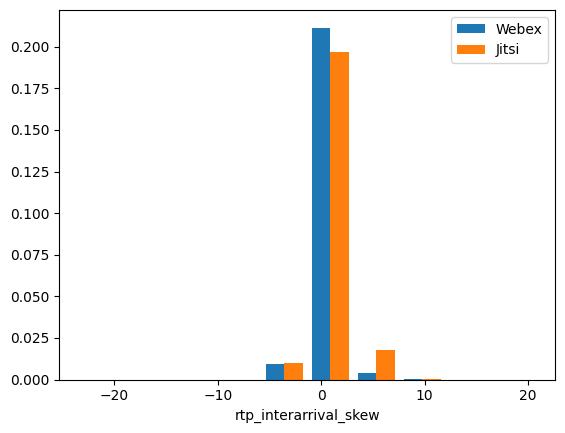

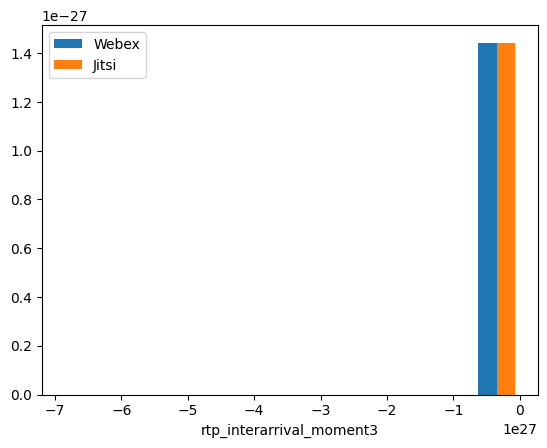

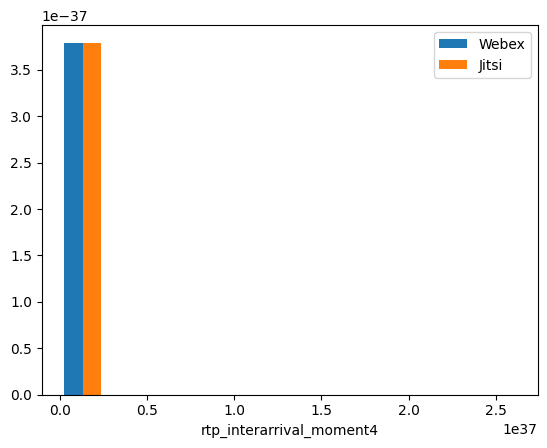

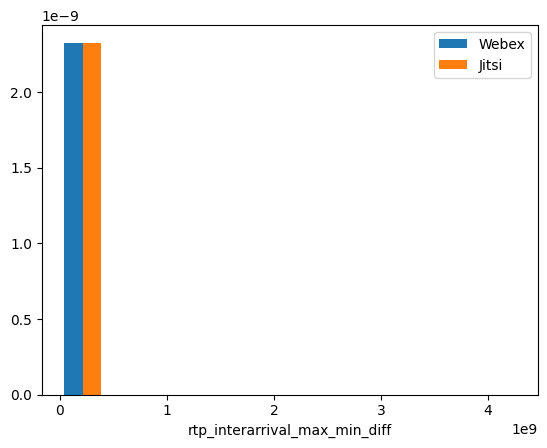

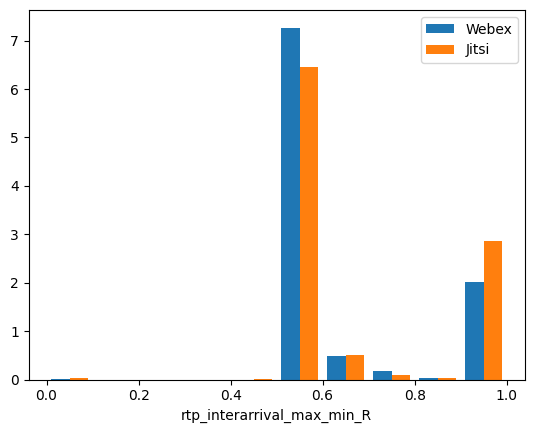

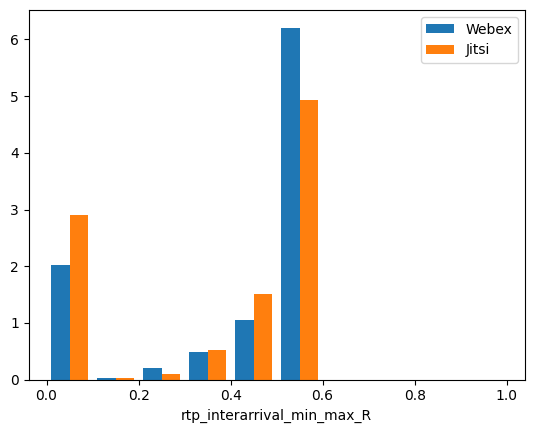

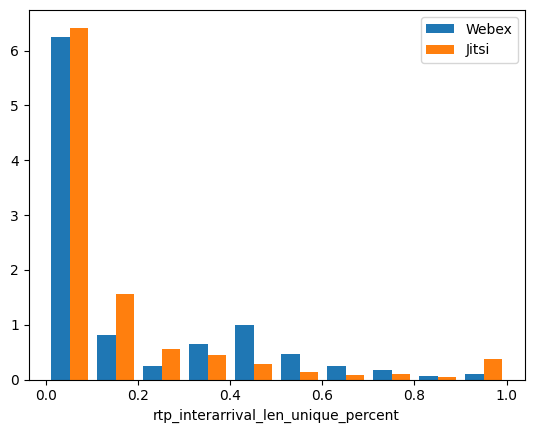

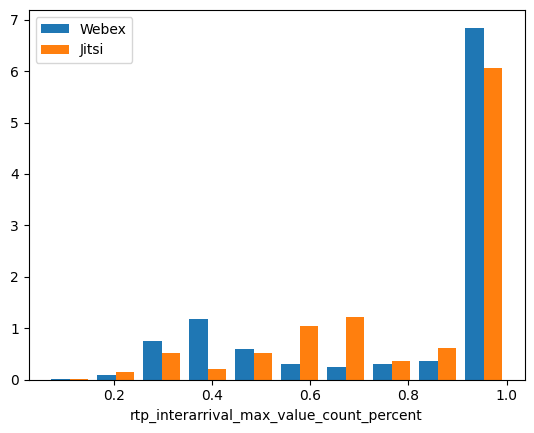

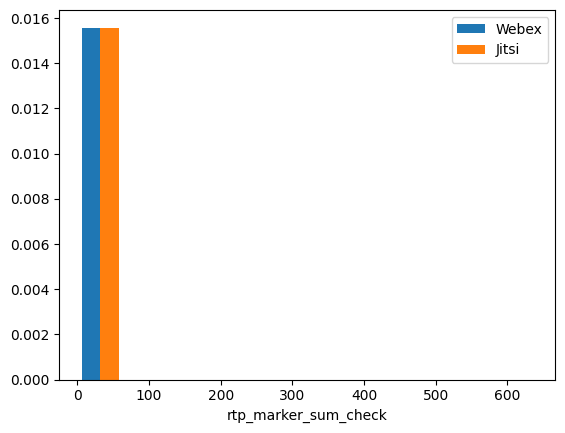

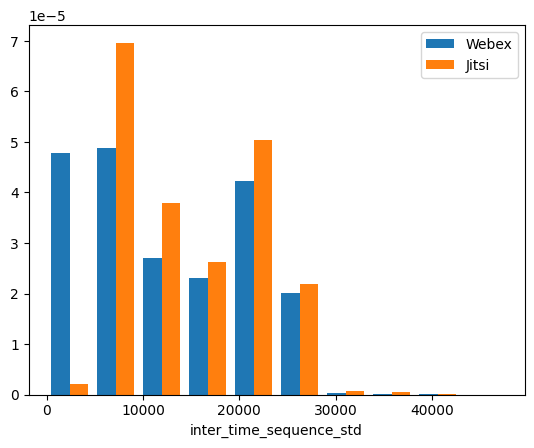

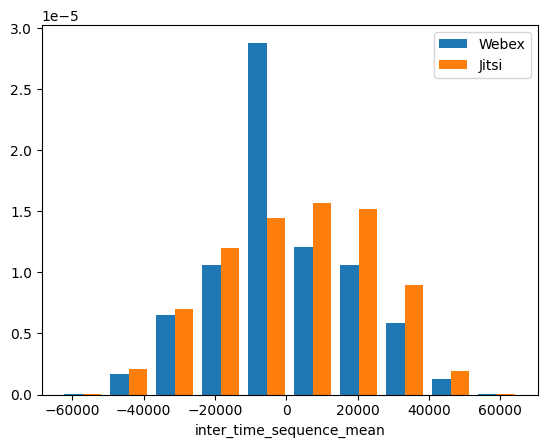

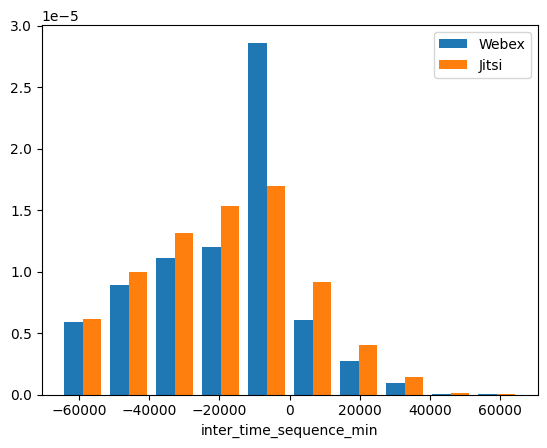

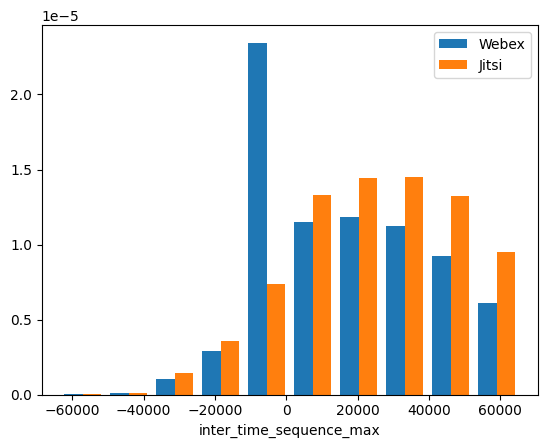

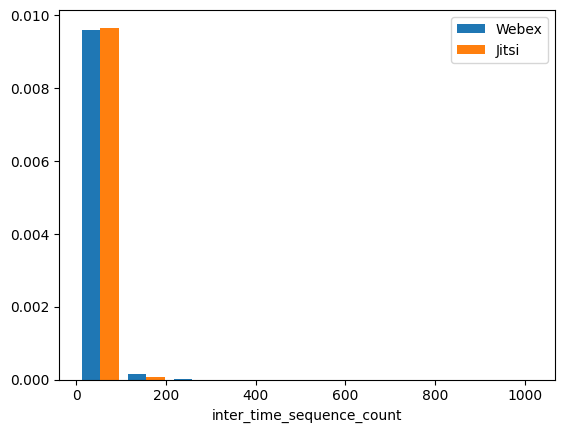

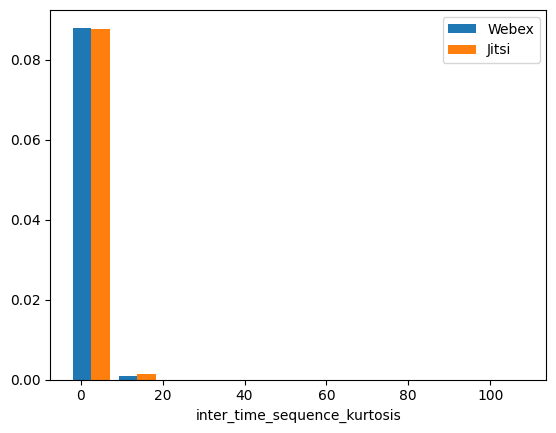

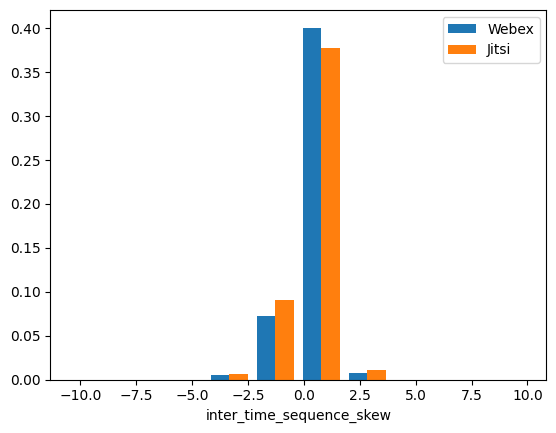

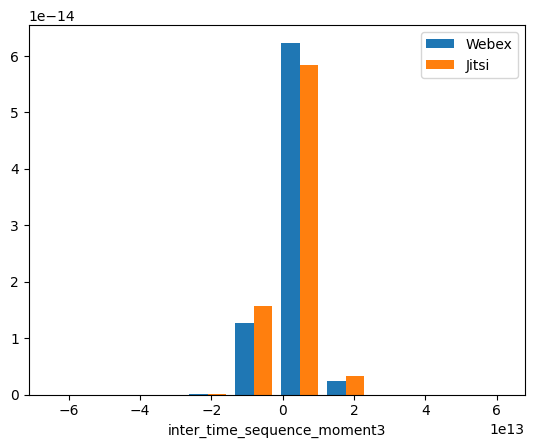

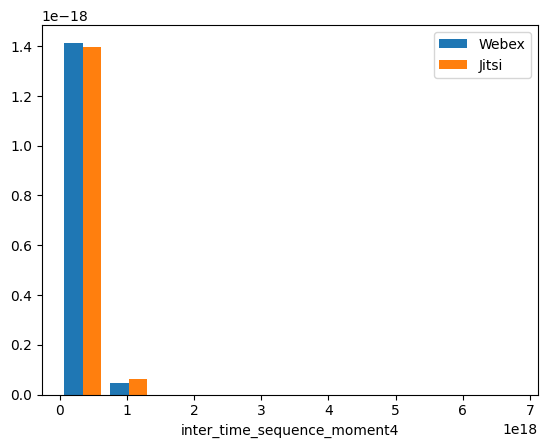

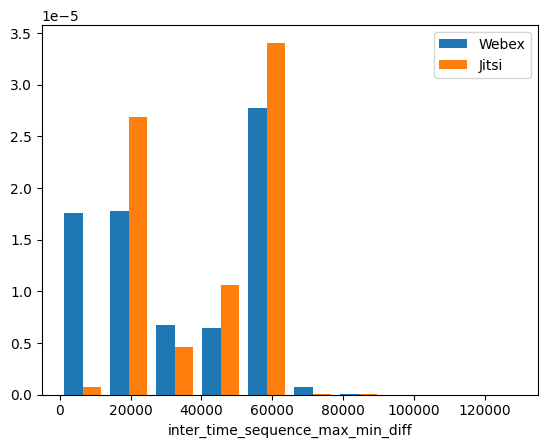

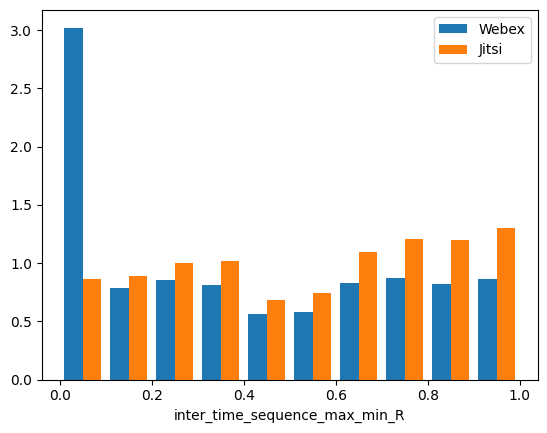

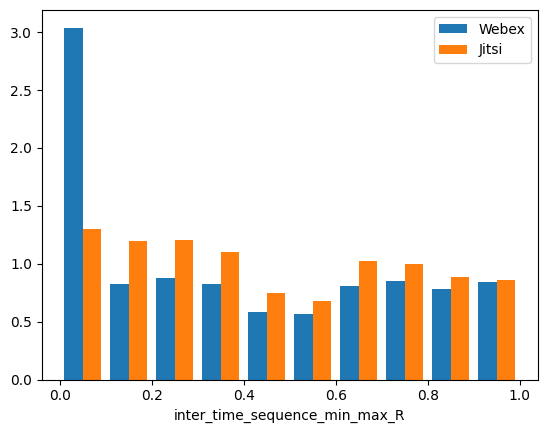

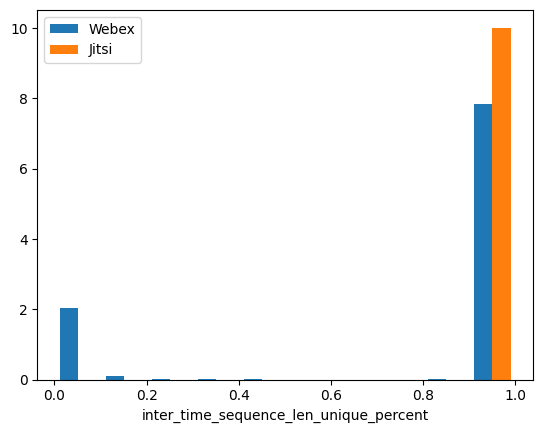

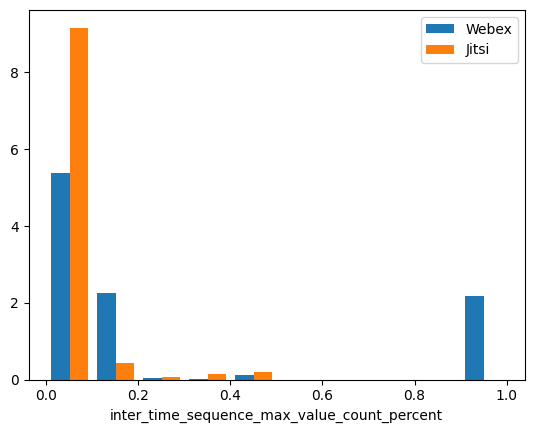

In [5]:
for i in stat_feat:
    plt.figure()
    plt.hist([np.array(df[filt_webex][i]), np.array(df[filt_webrtc][i])], density=True)
    plt.xlabel(i)
    plt.legend(['Webex','Jitsi'])
    plt.show()

### <ins> Point 6. </ins>

In [21]:
print(random.sample(sorted(C_webex.index),3))
print(random.sample(sorted(C_webrtc.index),2))

[63, 58, 65]
[39, 27]


# Below it shall be deleted probably

In [73]:
step=500
#sum_loss=df.loc[0:500,'num_packet_loss'].sum()
x_ax = np.linspace(0,len(df),42758)
x_ax= np.floor(x_ax)
start=0
losses=[]
for j in x_ax:
    sum_loss=df.loc[start:j,'num_packet_loss'].sum()
    start=j
    losses.append(sum_loss)


In [88]:
TotalLoss=np.sum(df['num_packet_loss'])
LossesPercentage=[]
CntLoss=0
for j in range(df.shape[0]):
    CntLoss=CntLoss+df.loc[j,'num_packet_loss']
    Percent=CntLoss/TotalLoss
    LossesPercentage.append(Percent)







<Axes: >

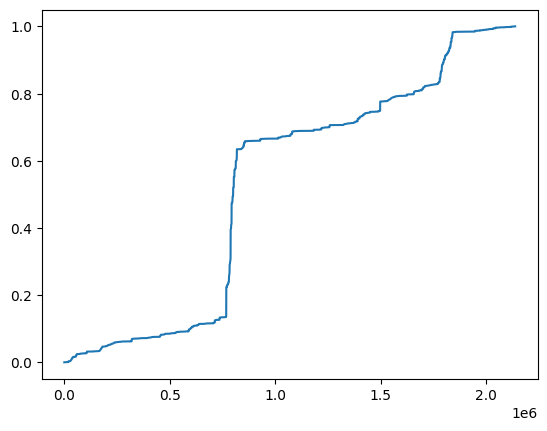

In [95]:
sns.lineplot(
    x = range(len(LossesPercentage)), # which column to use for x-axis
    y = LossesPercentage, # which column to use for y-axis
)
#plt.show()

<Axes: >

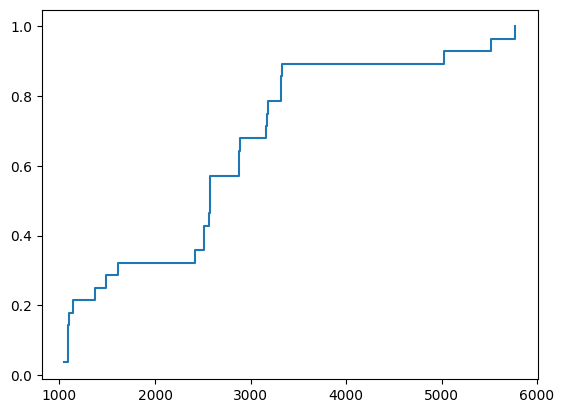

In [103]:
Filtered=(df['num_packet_loss'])[df['num_packet_loss']>1000]
ecdf_values=np.arange(1,len(Filtered)+1)/len(Filtered)
sns.lineplot(x=sorted(Filtered),y=ecdf_values,drawstyle='steps-post')
#sns.ecdfplot(
#    data = df[Filtered],
#    x ='num_packet_loss', # the column that you want to compute ecdf, they will be in the order from short to long length (numerical order)
#)

In [64]:
x_ax = np.linspace(0,len(df),213793)
x_ax

array([0.00000000e+00, 1.00000327e+01, 2.00000655e+01, ...,
       2.13790700e+06, 2.13791700e+06, 2.13792700e+06])

In [72]:
len(df)/50

42758.54

In [34]:
df['num_packet_loss'].max()

5771